# <div class="alert alert-danger"><center><font color=black>The Capstone Project of Data Analytics Module</font></center></div>
# <div class="alert alert-danger"><center><font color=black>Car Price Prediction EDA</font></center></div> 
# <div class="alert alert-danger"><center><font color=black>PART- 02 (Handling Missing Values)</font></center></div>

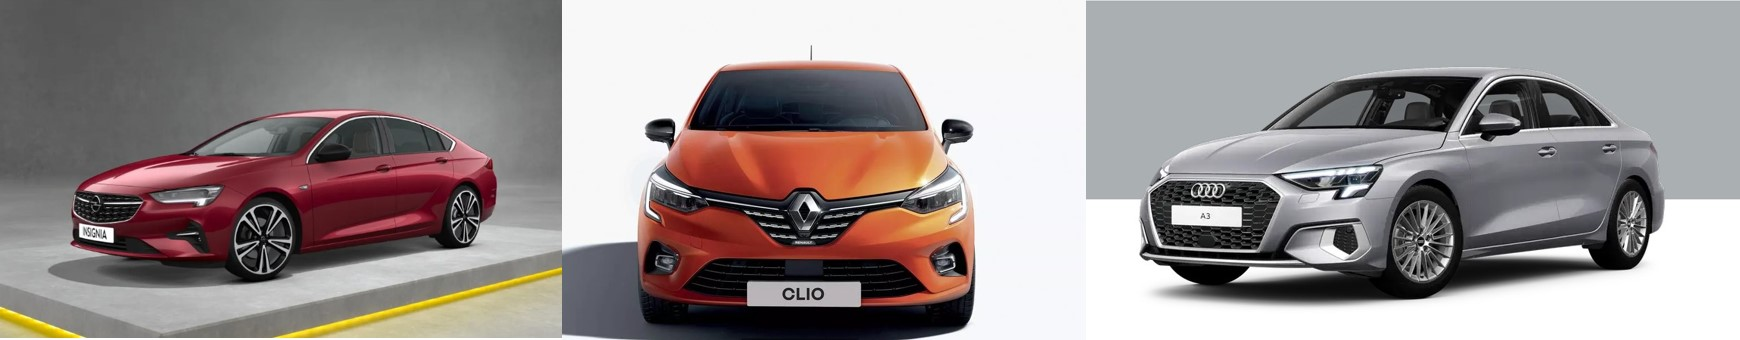

## <div class="alert alert-danger"><font color=black>1. <u>Introduction :</u></font></div>

This is my capstone project of Data Analytics Module. Auto Scout data used for this project, were scraped from the on-line car trading company, Auto Scout, in 2019, contains many features of 9 different car models. In this project, I applied many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy.

The project consists of **3 parts:**
* **``First part``** is related to **``'data cleaning'``**. It deals with Incorrect Headers (Column names), Incorrect Format, Anomalies, Dropping useless columns.
* **``Second part``** is related to **``'filling data'``**. It deals with Missing Values. Categorical to numeric transformation is done.
* **``Third part``** is related to **``'handling outliers of data'``** via Visualisation libraries. Some insights are extracted.

## <div class="alert alert-danger"><font color=black>2. <u>Importing Libraries Needed in This Notebook :</u></font></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

## <div class="alert alert-danger"><font color=black>3. <u>Reading the Data from File :</u></font></div>

In [2]:
df0 = pd.read_csv("clean_auto_scout.csv")
df = df0.copy()

## <div class="alert alert-danger"><font color=black>4. <u>Recognizing and Understanding Data :</u></font></div>

In [3]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
hp_kW,66.000,141.000,85.000
type,Used,Used,Used
previous_owners,2.000,NaN,1.000
inspection_new,Yes,NaN,NaN
warranty,NaN,NaN,NaN


In [4]:
# df.sample(3).T

In [5]:
# df.tail(3).T

In [6]:
df.shape

(15919, 32)

<div class="alert alert-success"><font color=black><b>There are <mark>15919 samples</mark> in the dataset. There are <mark>32 columns</mark> (features) in the dataset including both categorical and numerical ones.</b></font></div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               15919 non-null  object 
 1   body_type                15859 non-null  object 
 2   price                    15919 non-null  int64  
 3   vat                      11406 non-null  object 
 4   km                       14895 non-null  float64
 5   hp_kW                    15831 non-null  float64
 6   type                     15917 non-null  object 
 7   previous_owners          9279 non-null   float64
 8   inspection_new           3932 non-null   object 
 9   warranty                 4853 non-null   float64
 10  paint_type               10147 non-null  object 
 11  nr_of_doors              15707 non-null  float64
 12  nr_of_seats              14942 non-null  float64
 13  gearing_type             15919 non-null  object 
 14  cylinders             

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18019.897,7386.169,13.000,12850.000,16900.000,21900.000,74600.000
km,14895.000,34130.128,37352.978,0.000,5153.000,22740.000,49371.500,317000.000
hp_kW,15831.000,88.368,26.835,1.000,66.000,85.000,101.000,294.000
previous_owners,9279.000,1.068,0.330,0.000,1.000,1.000,1.000,4.000
warranty,4853.000,21.927,15.771,1.000,12.000,12.000,24.000,72.000
nr_of_doors,15707.000,4.656,0.645,1.000,4.000,5.000,5.000,7.000
nr_of_seats,14942.000,4.950,0.490,2.000,5.000,5.000,5.000,7.000
cylinders,10239.000,3.797,0.415,1.000,4.000,4.000,4.000,8.000
CO2_emission,13483.000,123.740,269.952,0.000,104.000,116.000,129.000,14457.000
gears,11207.000,5.925,0.848,1.000,5.000,6.000,6.000,50.000


In [9]:
df.describe(include=[object]).T

,count,unique,top,freq
make_model,15919,9,Audi A3,3097
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
type,15917,5,Used,11096
inspection_new,3932,1,Yes,3932
paint_type,10147,3,Metallic,9794
gearing_type,15919,3,Manual,8153
drive_chain,9061,3,front,8886
fuel,15919,4,Benzine,8551
emission_class,12291,3,Euro 6,12173


## <div class="alert alert-danger"><font color=black>5. <u>Checking the Missing Values for each column :</u></font></div>

In [10]:
missing_count = pd.DataFrame(df.isnull().sum(), columns = ['missing_count'])

In [11]:
missing_percentage = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['missing_percentage'])

In [12]:
missing_summary = pd.concat([missing_count, missing_percentage], axis = 1).reset_index().rename({'index':'columns'},axis = 1)
missing_summary

,columns,missing_count,missing_percentage
0,make_model,0,0.000
1,body_type,60,0.377
2,price,0,0.000
3,vat,4513,28.350
4,km,1024,6.433
5,hp_kW,88,0.553
6,type,2,0.013
7,previous_owners,6640,41.711
8,inspection_new,11987,75.300
9,warranty,11066,69.514


## <div class="alert alert-danger"><font color=black>6. <u>Examination and Filling of the Missing Values in the Columns :</u></font></div>

<div class="alert alert-success"><font color=black><b>First of all, I found the <mark>columns</mark> which have <mark>missing value.</mark></b></font></div>

In [13]:
missing_values = []

[missing_values.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")

missing_values

Columns that have missing values :


['body_type',
 'vat',
 'km',
 'hp_kW',
 'type',
 'previous_owners',
 'inspection_new',
 'warranty',
 'paint_type',
 'nr_of_doors',
 'nr_of_seats',
 'cylinders',
 'drive_chain',
 'CO2_emission',
 'emission_class',
 'comfort_and_convenience',
 'entertainment_and_media',
 'extras',
 'safety_and_security',
 'gears',
 'age',
 'upholstery_type',
 'upholstery_color',
 'displacement_cc',
 'weight_kg',
 'cons_comb',
 'cons_city',
 'cons_country']

<div class="alert alert-success"><font color=black><b>Now, I can <mark>examine</mark> and <mark>fill the missing values</mark> of all the columns.</b></font></div>

### <div class="alert alert-info"><font color=black>body_type :</font></div>

<div class="alert alert-success"><font color=black><b>The following function gives <mark>summary information about the missing values</mark> in the columns. I used this function for all columns which have missing value for <mark>preliminary analysis.</mark></b></font></div>

In [14]:
def summary_info(column):
    print("column name           : ", column)
    print("--------------------------------")
    print("percentage_of_nulls   : ", "%", round(df[column].isnull().sum()*100 / df.shape[0], 2))
    print("number_of_nulls       :   ", df[column].isnull().sum())
    print("number_of_uniques     :   ", df[column].nunique())
    print("--------------------------------")
    print(df[column].value_counts(dropna = False).head(15))

In [15]:
summary_info("body_type")

column name           :  body_type
--------------------------------
percentage_of_nulls   :  % 0.38
number_of_nulls       :    60
number_of_uniques     :    9
--------------------------------
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


<div class="alert alert-success"><font color=black><b>There is <mark>no information about "Other" type</mark>. So, I have <mark>assigned "Other" type to "NaN"  </mark> to use <mark>"fillna"</mark> function.</b></font></div>

In [16]:
df["body_type"].replace("Other", np.nan, inplace=True) 

In [17]:
df['body_type'].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
NaN               350
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

<div class="alert alert-success"><font color=black><b>I have decided that the <mark>mod method</mark> is the most logical way to <mark>fill the NaN values</mark> of this column.</b></font></div>

In [18]:
df["body_type"].mode()

0    Sedans
Name: body_type, dtype: object

In [19]:
df["body_type"].mode()[0]

'Sedans'

In [20]:
df["make_model"].unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

<div class="alert alert-success"><font color=black><b>The following function <mark>fills the missing values with the most existing value (mode)</mark> in the relevant column according to single-stage grouping.</b></font></div>

In [21]:
def fill_mode(df, group_column, column_name):
    
    for group in list(df[group_column].unique()):
        cond = df[group_column]==group
        mode = list(df[cond][column_name].mode())
        if mode != []:
            df.loc[cond, column_name] = df.loc[cond, column_name].fillna(df[cond][column_name].mode()[0])
        else:
            df.loc[cond, column_name] = df.loc[cond, column_name].fillna(df[column_name].mode()[0])
    
    print("Number of NaN  :",df[column_name].isnull().sum())
    print("---------------------")
    print(df[column_name].value_counts(dropna=False))

<div class="alert alert-success"><font color=black><b>In order for the filling process to be more precise, I first <mark>grouped by "make_model" column</mark> and then <mark>filled the NaN values with the mode of the "body_type" column according to this grouping.</mark></b></font></div>

In [22]:
fill_mode(df, "make_model", "body_type")

Number of NaN  : 0
---------------------
Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


### <div class="alert alert-info"><font color=black>vat :</font></div>

In [23]:
summary_info("vat")

column name           :  vat
--------------------------------
percentage_of_nulls   :  % 28.35
number_of_nulls       :    4513
number_of_uniques     :    2
--------------------------------
VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64


<div class="alert alert-success"><font color=black><b><mark>"describe ()" method does NOT return anything for "NaN" values.</mark> If you have "NaN" at the column you are interested in, you should replace these "NaN" values with something else. I have replaced the <mark>"NaN"</mark> values with <mark>"-", </mark> so that I could implement the <mark>"describe ()" method.</mark></b></font></div>

In [24]:
df["vat"].fillna("-", inplace = True)

In [25]:
df.groupby(["make_model", "body_type", "vat"]).price.describe().head(15)

count      mean      std  \
make_model body_type     vat                                           
Audi A1    Compact       -                257.000 16692.856 3377.345   
                         Price negotiable   3.000 17631.667 1548.954   
                         VAT deductible   779.000 20018.999 4603.192   
           Coupe         VAT deductible     2.000 14925.000 1378.858   
           Sedans        -                498.000 17650.865 4225.473   
                         Price negotiable  78.000 16224.308 3545.634   
                         VAT deductible   975.000 19370.279 4470.516   
           Station wagon -                  4.000 22332.000 7763.736   
                         VAT deductible    17.000 16747.706 2481.100   
           Van           VAT deductible     1.000 29000.000      NaN   
Audi A2    Off-Road      VAT deductible     1.000 28200.000      NaN   
Audi A3    Compact       -                 54.000 19112.074 4680.287   
                         Price negotiable   3.000 22613.333 8141.992   
                         VAT deductible   125.000 18900.496 7543.020   
           Convertible   -                  3.000 28150.000 5598.437   

                                                min       25%       50%  \
make_model body_type     vat                                              
Audi A1    Compact       -                11100.000 14990.000 15850.000   
                         Price negotiable 15950.000 16947.500 17945.000   
                         VAT deductible    9950.000 16370.000 19990.000   
           Coupe         VAT deductible   13950.000 14437.500 14925.000   
           Sedans        -                 8999.000 14819.000 16495.000   
                         Price negotiable 10800.000 13912.500 15299.500   
                         VAT deductible   10000.000 15950.000 18900.000   
           Station wagon -                13999.000 16579.750 23165.000   
                         VAT deductible   12950.000 15750.000 16290.000   
           Van           VAT deductible   29000.000 29000.000 29000.000   
Audi A2    Off-Road      VAT deductible   28200.000 28200.000 28200.000   
Audi A3    Compact       -                13100.000 15600.000 18472.500   
                         Price negotiable 16990.000 17945.000 18900.000   
                         VAT deductible   12900.000 13500.000 16990.000   
           Convertible   -                22000.000 25750.000 29500.000   

                                                75%       max  
make_model body_type     vat                                   
Audi A1    Compact       -                17900.000 29181.000  
                         Price negotiable 18472.500 19000.000  
                         VAT deductible   22730.000 31990.000  
           Coupe         VAT deductible   15412.500 15900.000  
           Sedans        -                20300.000 37900.000  
                         Price negotiable 18112.500 33900.000  
                         VAT deductible   22315.000 35900.000  
           Station wagon -                28917.250 28999.000  
                         VAT deductible   16880.000 21450.000  
           Van           VAT deductible   29000.000 29000.000  
Audi A2    Off-Road      VAT deductible   28200.000 28200.000  
Audi A3    Compact       -                20877.500 41495.000  
                         Price negotiable 25425.000 31950.000  
                         VAT deductible   20300.000 67600.000  
           Convertible   -                31225.000 32950.000

<div class="alert alert-success"><font color=black><b>I could fill missing values with <mark>"ffill/bfill" method</mark> to maintain the current proportionality, but when I examined <mark>"vat"</mark> and <mark>"price"</mark> columns I could <mark>not find significant relationship</mark> between these columns. So, I've decided to <mark>drop this column</mark> since it would not be a logical filling.</b></font></div>

In [26]:
df.drop("vat", axis=1, inplace=True)

In [27]:
df.shape

(15919, 31)

### <div class="alert alert-info"><font color=black>age :</font></div>

In [28]:
summary_info("age")

column name           :  age
--------------------------------
percentage_of_nulls   :  % 10.03
number_of_nulls       :    1597
number_of_uniques     :    4
--------------------------------
1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64


In [29]:
df['age'].fillna('-', inplace=True)

In [30]:
df["age"].value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
-      1597
Name: age, dtype: int64

In [31]:
df.groupby("age").km.describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,2706.000,2085.355,5365.881,1.000,10.000,50.000,3000.000,127022.000
1.0,4484.000,18035.239,11052.524,1.000,9990.000,17872.000,25078.500,136000.000
2.0,3272.000,41754.941,28295.748,1.000,21541.750,34752.000,54805.500,317000.000
3.0,3674.000,77442.521,39170.143,10.000,48000.000,72914.500,99950.000,291800.000
-,759.000,934.497,7416.244,0.000,5.000,10.000,10.000,89982.000


<div class="alert alert-success"><font color=black><b>When filling in the <mark>age</mark> column, I took the <mark>average km values</mark> into consideration. According to this; km of cars <mark>less than 10000 km</mark> are included in the <mark>age group 0</mark>, km of cars <mark>between 10000 km and 30000 km</mark> are in the <mark>age group of 1</mark>, km of cars <mark>between 30000 km and 50000 km</mark> are in the <mark>age group of 2</mark> and cars km of cars <mark>over 50000 km</mark> are in the <mark>age group of 3.</mark></b></font></div>

In [32]:
age_0 = (df['km'] <= 10000)
age_1 = ((df['km'] > 10000) & (df['km'] <= 30000))
age_2 = ((df['km'] > 30000) & (df['km'] <= 50000))
age_3 = (df['km'] > 50000)

In [33]:
df.loc[age_0,'age'] = df.loc[age_0,'age'].replace('-', 0)

In [34]:
df.loc[age_1,'age'] = df.loc[age_1,'age'].replace('-', 1)

In [35]:
df.loc[age_2,'age'] = df.loc[age_2,'age'].replace('-', 2)

In [36]:
df.loc[age_3,'age'] = df.loc[age_3,'age'].replace('-', 3)

In [37]:
df.groupby('age').km.mean()

age
0.0    1647.363
1.0   18035.130
2.0   41748.577
3.0   77450.063
-           NaN
Name: km, dtype: float64

<div class="alert alert-success"><font color=black><b>After filling the <mark>"missing values"</mark>, we see that the  <mark>mean of "km"</mark> for each  <mark>"age" </mark> group is very close to the old averages.</mark></b></font></div>

In [38]:
df["age"].value_counts(dropna=False)

1.0    4528
3.0    3679
0.0    3597
2.0    3277
-       838
Name: age, dtype: int64

<div class="alert alert-success"><font color=black><b>After filling the <mark>"missing values"</mark>, we see that there have still been <mark>some missing values represented by "-".</mark></b></font></div>

In [39]:
df.groupby(['make_model',"body_type", 'age']).price.describe().head(20)

count      mean      std       min       25%  \
make_model body_type     age                                                  
Audi A1    Compact       0.0 198.000 23277.434 3510.406 14900.000 20503.500   
                         1.0 268.000 18596.041 2659.910 13980.000 16445.000   
                         2.0 161.000 16602.807 2085.384 10999.000 15450.000   
                         3.0 234.000 14532.910 1908.909  9950.000 13407.500   
                         -   178.000 23996.264 3383.852 16220.000 21515.000   
           Coupe         2.0   1.000 15900.000      NaN 15900.000 15900.000   
                         3.0   1.000 13950.000      NaN 13950.000 13950.000   
           Sedans        0.0 376.000 24151.027 3175.529 15990.000 21800.000   
                         1.0 468.000 18384.692 2583.017 13450.000 16321.000   
                         2.0 267.000 16631.180 2259.427 11600.000 14960.000   
                         3.0 389.000 14466.900 1890.278  8999.000 13000.000   
                         -    51.000 23307.412 3782.712 15980.000 20985.000   
           Station wagon 0.0   2.000 28944.500   77.075 28890.000 28917.250   
                         1.0  11.000 17410.909 2166.031 15750.000 15870.000   
                         2.0   3.000 17613.333 2953.817 14750.000 16095.000   
                         3.0   5.000 14358.000 1276.891 12950.000 13979.000   
           Van           0.0   1.000 29000.000      NaN 29000.000 29000.000   
Audi A2    Off-Road      1.0   1.000 28200.000      NaN 28200.000 28200.000   
Audi A3    Compact       0.0  17.000 29345.471 8767.065 15500.000 22300.000   
                         1.0  29.000 22030.931 4270.469 14500.000 19999.000   

                                   50%       75%       max  
make_model body_type     age                                
Audi A1    Compact       0.0 22492.000 26798.500 31990.000  
                         1.0 16980.000 20950.000 23829.000  
                         2.0 15850.000 17700.000 22150.000  
                         3.0 13994.500 15480.000 18900.000  
                         -   22875.000 27380.000 29181.000  
           Coupe         2.0 15900.000 15900.000 15900.000  
                         3.0 13950.000 13950.000 13950.000  
           Sedans        0.0 23745.000 26890.000 37900.000  
                         1.0 16949.000 20155.000 33900.000  
                         2.0 15900.000 18075.000 23490.000  
                         3.0 13950.000 15784.000 19900.000  
                         -   22290.000 26720.000 29137.000  
           Station wagon 0.0 28944.500 28971.750 28999.000  
                         1.0 16480.000 18260.000 21450.000  
                         2.0 17440.000 19045.000 20650.000  
                         3.0 13999.000 14440.000 16422.000  
           Van           0.0 29000.000 29000.000 29000.000  
Audi A2    Off-Road      1.0 28200.000 28200.000 28200.000  
Audi A3    Compact       0.0 24900.000 37998.000 41495.000  
                         1.0 21900.000 22599.000 39959.000

<div class="alert alert-success"><font color=black><b>When the average values of the <mark>"price" column</mark>, which is the target column, are analyzed by grouping according to <mark>"make_model", "body_type" and "age"</mark>; it has seen that <mark>the averages of the "missing values"</mark> are close to the <mark>average values of the 0-year-old cars.</mark>Therefore, I filled <mark>"missing values"</mark> of the <mark>"age" column as 0 age.</mark></b></font></div>

In [40]:
df['age'].replace('-', 0, inplace=True)

In [41]:
df.groupby('age').km.mean()

age
0.000    1647.363
1.000   18035.130
2.000   41748.577
3.000   77450.063
Name: km, dtype: float64

In [42]:
df["age"].value_counts(dropna=False)

1.000    4528
0.000    4435
3.000    3679
2.000    3277
Name: age, dtype: int64

### <div class="alert alert-info"><font color=black>km :</font></div>

In [43]:
summary_info("km")

column name           :  km
--------------------------------
percentage_of_nulls   :  % 6.43
number_of_nulls       :    1024
number_of_uniques     :    6689
--------------------------------
10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
100.000       139
15.000        109
5000.000      104
20.000         61
3000.000       58
12.000         56
8000.000       49
45000.000      48
10000.000      47
25000.000      47
Name: km, dtype: int64


In [44]:
df.groupby("age").km.mean()

age
0.000    1647.363
1.000   18035.130
2.000   41748.577
3.000   77450.063
Name: km, dtype: float64

In [45]:
df[df["km"].isna()][["age", "km"]]

,age,km
743,0.000,NaN
869,0.000,NaN
946,0.000,NaN
977,0.000,NaN
980,0.000,NaN
...,...,...
15890,0.000,NaN
15902,0.000,NaN
15912,0.000,NaN
15914,0.000,NaN


<div class="alert alert-success"><font color=black><b>I filled <mark>"missing values"</mark> of the <mark>"km" column</mark> with the "mean" of the <mark>"km" column</mark> for each <mark>"age" group</mark> by using <mark>transform () function.</mark></b></font></div>

In [46]:
df.groupby("age").km.transform("mean")

0       77450.063
1       41748.577
2       77450.063
3       77450.063
4       77450.063
           ...   
15914    1647.363
15915    1647.363
15916    1647.363
15917    1647.363
15918    1647.363
Name: km, Length: 15919, dtype: float64

In [47]:
df["km"].fillna(df.groupby("age").km.transform("mean"), inplace=True)

In [48]:
df[df["km"].isna()][["age", "km"]]

,age,km


In [49]:
df.km.value_counts(dropna=False)

10.000       1045
1647.363      985
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6692, dtype: int64

### <div class="alert alert-info"><font color=black>hp_kW :</font></div>

In [50]:
summary_info("hp_kW")

column name           :  hp_kW
--------------------------------
percentage_of_nulls   :  % 0.55
number_of_nulls       :    88
number_of_uniques     :    80
--------------------------------
85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
Name: hp_kW, dtype: int64


In [51]:
df["hp_kW"].fillna("-", inplace=True)

In [52]:
df.groupby(["make_model", "body_type","hp_kW"]).price.describe().head(15)

count      mean      std       min       25%  \
make_model body_type hp_kW                                                  
Audi A1    Compact   60.0   58.000 15189.828 1663.611 10900.000 14390.000   
                     66.0  162.000 15398.210 1934.301 10490.000 14042.500   
                     70.0  332.000 17983.262 3315.814  9950.000 15480.000   
                     71.0   32.000 20831.594 2410.840 15890.000 18937.500   
                     85.0  330.000 22604.103 4572.568 11100.000 19700.000   
                     86.0    1.000 14295.000      NaN 14295.000 14295.000   
                     92.0   90.000 18029.056 3027.431 12550.000 15850.000   
                     93.0    2.000 21447.500  774.282 20900.000 21173.750   
                     110.0  20.000 23620.450 3777.344 15490.000 21299.500   
                     141.0   2.000 22495.000  841.457 21900.000 22197.500   
                     147.0   8.000 28797.125  355.356 28200.000 28535.000   
                     -       2.000 19125.000 5126.524 15500.000 17312.500   
           Coupe     70.0    1.000 13950.000      NaN 13950.000 13950.000   
                     85.0    1.000 15900.000      NaN 15900.000 15900.000   
           Sedans    60.0   95.000 15218.168 1624.267 11900.000 14099.500   

                                 50%       75%       max  
make_model body_type hp_kW                                
Audi A1    Compact   60.0  15774.500 16345.000 16978.000  
                     66.0  15465.000 16445.000 23700.000  
                     70.0  17447.000 21190.000 28990.000  
                     71.0  21425.000 22462.250 25256.000  
                     85.0  22497.000 26980.000 31990.000  
                     86.0  14295.000 14295.000 14295.000  
                     92.0  16935.000 20624.250 28880.000  
                     93.0  21447.500 21721.250 21995.000  
                     110.0 23325.000 26932.500 28980.000  
                     141.0 22495.000 22792.500 23090.000  
                     147.0 28900.000 29042.500 29181.000  
                     -     19125.000 20937.500 22750.000  
           Coupe     70.0  13950.000 13950.000 13950.000  
                     85.0  15900.000 15900.000 15900.000  
           Sedans    60.0  15300.000 15984.000 22390.000

In [53]:
df["hp_kW"].replace(["-"], np.nan, inplace=True)

<div class="alert alert-success"><font color=black><b>The <mark>"hp" of cars changes</mark> by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>The following function <mark>fills the missing values with the most existing value (mode)</mark> in the relevant column according to <mark>double-stage grouping.</mark></b></font></div>

In [54]:
def fill_mode_2(df, group_column_1, group_column_2, column_name):
    
    for group_1 in list(df[group_column_1].unique()):
        for group_2 in list(df[group_column_2].unique()):
            cond_1 = df[group_column_1]==group_1
            cond_2 = (df[group_column_1]==group_1) & (df[group_column_2]==group_2)
            mode_1 = list(df[cond_1][column_name].mode())
            mode_2 = list(df[cond_2][column_name].mode())
            if mode_2 != []:
                df.loc[cond_2, column_name] = df.loc[cond_2, column_name].fillna(df[cond_2][column_name].mode()[0])
            elif mode_1 != []:
                df.loc[cond_2, column_name] = df.loc[cond_2, column_name].fillna(df[cond_1][column_name].mode()[0])
            else:
                df.loc[cond_2, column_name] = df.loc[cond_2, column_name].fillna(df[column_name].mode()[0])
    
    print("Number of NaN  :",df[column_name].isnull().sum())
    print("---------------------")
    print(df[column_name].value_counts(dropna=False).head(15))

In [55]:
fill_mode_2(df, "make_model", "body_type", "hp_kW")

Number of NaN  : 0
---------------------
85.000     2543
66.000     2124
81.000     1403
100.000    1314
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
Name: hp_kW, dtype: int64


### <div class="alert alert-info"><font color=black>type :</font></div>

In [56]:
summary_info("type")

column name           :  type
--------------------------------
percentage_of_nulls   :  % 0.01
number_of_nulls       :    2
number_of_uniques     :    5
--------------------------------
Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64


In [57]:
df.type.fillna("-", inplace=True)

In [58]:
df.groupby(["type", "make_model", "age"]).km.describe().head(15)

count       mean       std        min  \
type          make_model    age                                             
-             Audi A3       0.000   1.000   1647.363       NaN   1647.363   
                            3.000   1.000 115137.000       NaN 115137.000   
Demonstration Audi A1       0.000 110.000   3784.227  2498.415     10.000   
                            1.000  19.000   9931.158  5209.543   1050.000   
                            2.000   6.000  22963.500 17802.677  11940.000   
              Audi A3       0.000  41.000   4971.878  3092.353     50.000   
                            1.000  16.000  12801.188 10920.150   1015.000   
                            2.000   5.000  27950.000  9145.354  16000.000   
              Opel Astra    0.000 148.000   2893.376  2879.037      3.000   
                            1.000  16.000   7319.938  7499.404    100.000   
                            2.000   1.000  68500.000       NaN  68500.000   
              Opel Corsa    0.000  75.000   1248.990  1687.252      3.000   
                            1.000  14.000   2915.500  5334.489     10.000   
              Opel Insignia 0.000 161.000   3936.658  3983.602      5.000   
                            1.000   6.000  13721.000 11237.453   3000.000   

                                         25%        50%        75%        max  
type          make_model    age                                                
-             Audi A3       0.000   1647.363   1647.363   1647.363   1647.363  
                            3.000 115137.000 115137.000 115137.000 115137.000  
Demonstration Audi A1       0.000   2541.250   3000.500   4999.750  12700.000  
                            1.000   5500.000   9522.000  14560.000  18900.000  
                            2.000  15327.250  16378.500  18425.000  59000.000  
              Audi A3       0.000   3000.000   5000.000   6000.000  14000.000  
                            1.000   4562.250   9850.000  21020.750  38400.000  
                            2.000  23000.000  27500.000  33750.000  39500.000  
              Opel Astra    0.000    315.250   1773.681   4999.000  13542.000  
                            1.000   2160.500   2499.000  13514.750  22700.000  
                            2.000  68500.000  68500.000  68500.000  68500.000  
              Opel Corsa    0.000     10.000    518.000   1647.363   7623.000  
                            1.000    100.000    200.000   3157.500  18000.000  
              Opel Insignia 0.000   1000.000   3000.000   5555.000  20000.000  
                            1.000   5301.500  10103.000  21650.000  29920.000

In [59]:
df.groupby(["make_model", "age", "type"]).price.describe().head(20)

count      mean      std       min  \
make_model age   type                                                  
Audi A1    0.000 Demonstration  110.000 24349.327 3435.377 14900.000   
                 Employee's car  53.000 24226.811 3326.782 15990.000   
                 New            328.000 23324.509 3545.149 15980.000   
                 Pre-registered 128.000 24106.352 3167.453 16985.000   
                 Used           187.000 24268.027 3054.247 17900.000   
           1.000 Demonstration   19.000 19028.105 3386.435 15700.000   
                 Employee's car 131.000 18599.008 2750.835 15100.000   
                 Pre-registered  17.000 21636.882 2266.241 16490.000   
                 Used           580.000 18299.076 2494.876 13450.000   
           2.000 Demonstration    6.000 16406.500 2180.037 13990.000   
                 Employee's car   8.000 18943.750 2014.313 15750.000   
                 Pre-registered   1.000 19980.000      NaN 19980.000   
                 Used           417.000 16576.374 2174.499 10999.000   
           3.000 Employee's car   5.000 16740.000 2609.214 13500.000   
                 Used           624.000 14471.739 1874.988  8999.000   
Audi A2    1.000 Employee's car   1.000 28200.000      NaN 28200.000   
Audi A3    0.000 -                1.000 25400.000      NaN 25400.000   
                 Demonstration   41.000 25654.610 2882.739 20990.000   
                 Employee's car  31.000 25142.548 1167.954 23500.000   
                 New            325.000 24391.975 2844.809 18820.000   

                                      25%       50%       75%       max  
make_model age   type                                                    
Audi A1    0.000 Demonstration  21920.000 23715.000 27380.000 29197.000  
                 Employee's car 21500.000 24970.000 27200.000 29000.000  
                 New            20690.000 22490.000 26980.000 31990.000  
                 Pre-registered 21567.500 23637.500 26462.500 35900.000  
                 Used           21900.000 23660.000 26775.000 37900.000  
           1.000 Demonstration  16020.000 16900.000 22890.000 23880.000  
                 Employee's car 16495.000 16980.000 20500.000 33900.000  
                 Pre-registered 20999.000 23200.000 23200.000 23630.000  
                 Used           16367.500 16920.000 20412.500 23880.000  
           2.000 Demonstration  15059.750 15924.500 17360.000 19990.000  
                 Employee's car 18712.500 19700.000 19887.500 20800.000  
                 Pre-registered 19980.000 19980.000 19980.000 19980.000  
                 Used           15000.000 15850.000 17930.000 23490.000  
           3.000 Employee's car 14300.000 18500.000 18700.000 18700.000  
                 Used           13237.500 13989.500 15685.000 19900.000  
Audi A2    1.000 Employee's car 28200.000 28200.000 28200.000 28200.000  
Audi A3    0.000 -              25400.000 25400.000 25400.000 25400.000  
                 Demonstration  24440.000 24980.000 26770.000 41495.000  
                 Employee's car 24220.000 24890.000 25900.000 27370.000  
                 New            22730.000 23988.000 25470.000 39575.000

<div class="alert alert-success"><font color=black><b>There are <mark>just two missing values.</mark> We can easly detect that <mark>one of them should be "New"</mark> and <mark>the other "Used" according to theirs km values.</mark></b></font></div>

In [60]:
condition_1 = (df['make_model'] == "Audi A3") & (df["age"] == 0)
condition_2 = (df['make_model'] == "Audi A3") & (df["age"] == 3)

In [61]:
df.loc[condition_1,'type'] = df.loc[condition_1,'type'].replace('-', 'New')
df.loc[condition_2,'type'] = df.loc[condition_2,'type'].replace('-', 'Used')

In [62]:
df['type'].value_counts(dropna=False)

Used              11097
New                1651
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: type, dtype: int64

### <div class="alert alert-info"><font color=black>previous_owners :</font></div>

In [63]:
summary_info("previous_owners")

column name           :  previous_owners
--------------------------------
percentage_of_nulls   :  % 41.71
number_of_nulls       :    6640
number_of_uniques     :    5
--------------------------------
1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: previous_owners, dtype: int64


In [64]:
df["previous_owners"].fillna("-", inplace = True)

In [65]:
df["previous_owners"].value_counts(dropna=False)

1.0    8294
-      6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [66]:
df.groupby(['make_model', 'body_type', 'age', 'previous_owners']).price.describe().head(15)

count      mean      std  \
make_model body_type age   previous_owners                              
Audi A1    Compact   0.000 0.0              16.000 22445.562 1877.170   
                           1.0              81.000 23396.506 3380.448   
                           2.0               1.000 21760.000      NaN   
                           -               278.000 23756.335 3555.133   
                     1.000 1.0             195.000 18108.738 2381.809   
                           2.0               7.000 19319.714 2516.064   
                           -                66.000 19959.045 2981.802   
                     2.000 1.0              65.000 16785.785 2346.619   
                           2.0              43.000 16099.070 1080.318   
                           -                53.000 16787.094 2318.335   
                     3.000 1.0             128.000 14317.625 2002.813   
                           2.0              50.000 15031.180 1293.334   
                           3.0               1.000 11990.000      NaN   
                           -                55.000 14627.200 2074.279   
           Coupe     2.000 -                 1.000 15900.000      NaN   

                                                 min       25%       50%  \
make_model body_type age   previous_owners                                 
Audi A1    Compact   0.000 0.0             19490.000 22174.750 22400.000   
                           1.0             14900.000 21330.000 22900.000   
                           2.0             21760.000 21760.000 21760.000   
                           -               16220.000 20988.000 22725.000   
                     1.000 1.0             13980.000 16430.000 16940.000   
                           2.0             16960.000 16980.000 18470.000   
                           -               14500.000 16800.000 20970.000   
                     2.000 1.0             10999.000 15450.000 15975.000   
                           2.0             14220.000 15850.000 15850.000   
                           -               12490.000 15290.000 15900.000   
                     3.000 1.0              9950.000 12942.500 13915.000   
                           2.0             11490.000 14966.750 14990.000   
                           3.0             11990.000 11990.000 11990.000   
                           -               11100.000 13400.000 13900.000   
           Coupe     2.000 -               15900.000 15900.000 15900.000   

                                                 75%       max  
make_model body_type age   previous_owners                      
Audi A1    Compact   0.000 0.0             22480.000 28650.000  
                           1.0             25800.000 29179.000  
                           2.0             21760.000 21760.000  
                           -               27380.000 31990.000  
                     1.000 1.0             19989.000 23829.000  
                           2.0             21949.000 21950.000  
                           -               22448.500 23700.000  
                     2.000 1.0             17970.000 21490.000  
                           2.0             15850.000 20990.000  
                           -               18950.000 22150.000  
                     3.000 1.0             15637.500 18880.000  
                           2.0             14990.000 17998.000  
                           3.0             11990.000 11990.000  
                           -               15675.000 18900.000  
           Coupe     2.000 -               15900.000 15900.000

In [67]:
df.groupby(['make_model', 'body_type', 'age', 'previous_owners']).km.describe().head(15)

count      mean       std  \
make_model body_type age   previous_owners                               
Audi A1    Compact   0.000 0.0              16.000  1031.477   821.188   
                           1.0              81.000  4172.407  3364.606   
                           2.0               1.000  3000.000       NaN   
                           -               278.000  1609.993  2071.784   
                     1.000 1.0             195.000 13843.036  8374.462   
                           2.0               7.000  9757.143  1806.338   
                           -                66.000 17130.561  7569.631   
                     2.000 1.0              65.000 25137.446 24924.797   
                           2.0              43.000 17495.372  5250.148   
                           -                53.000 26966.019 14730.313   
                     3.000 1.0             128.000 53844.062 29522.884   
                           2.0              50.000 49819.940 11702.299   
                           3.0               1.000 45000.000       NaN   
                           -                55.000 64144.000 28012.600   
           Coupe     2.000 -                 1.000 50000.000       NaN   

                                                 min       25%       50%  \
make_model body_type age   previous_owners                                 
Audi A1    Compact   0.000 0.0                 0.000     7.000  1647.363   
                           1.0                 1.000  1699.000  3200.000   
                           2.0              3000.000  3000.000  3000.000   
                           -                   1.000    15.000  1647.363   
                     1.000 1.0               973.000  6688.500 11200.000   
                           2.0              7500.000  8500.000 10000.000   
                           -                3254.000 10744.000 17532.500   
                     2.000 1.0              1478.000  9998.000 19044.000   
                           2.0              3900.000 17768.000 17768.000   
                           -                3718.000 21000.000 25500.000   
                     3.000 1.0             13776.000 31885.000 45581.500   
                           2.0             17100.000 49351.000 49351.000   
                           3.0             45000.000 45000.000 45000.000   
                           -               11300.000 40582.500 59500.000   
           Coupe     2.000 -               50000.000 50000.000 50000.000   

                                                 75%        max  
make_model body_type age   previous_owners                       
Audi A1    Compact   0.000 0.0              1647.363   1647.363  
                           1.0              6000.000  14900.000  
                           2.0              3000.000   3000.000  
                           -                1647.363  14999.000  
                     1.000 1.0             22125.000  33360.000  
                           2.0             10900.000  12000.000  
                           -               21272.500  31877.000  
                     2.000 1.0             30000.000 148257.000  
                           2.0             17768.000  38562.000  
                           -               30553.000  71240.000  
                     3.000 1.0             67994.250 168000.000  
                           2.0             50626.750  98000.000  
                           3.0             45000.000  45000.000  
                           -               87998.500 136000.000  
           Coupe     2.000 -               50000.000  50000.000

<div class="alert alert-success"><font color=black><b>It is <mark>not appear to be a significant relationship</mark> between <mark>"previous_owners" and "price" / "km" columns</mark> except Renault Duster. It seems that Renault Duster's <mark>"previous_owners"</mark> values <mark>should be "0".</mark></b></font></div>

In [68]:
df.loc[(df["make_model"]=="Renault Duster") & (df["previous_owners"] == "-"), "previous_owners"] = 0.0

In [69]:
df["previous_owners"].value_counts(dropna=False)

1.0    8294
-      6607
2.0     778
0.0     221
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [70]:
df["previous_owners"].replace("-", np.nan, inplace=True)

<div class="alert alert-success"><font color=black><b>I have decided that the <mark>"ffill and bfill method"</mark> is the most logical way to <mark>fill the NaN values</mark> of this column.</b></font></div>

<div class="alert alert-success"><font color=black><b>The following function <mark>fills the missing values with "ffill and bfill method"</mark> in the <mark> relevant column</mark>  according to <mark> single-stage grouping.</mark> </b></font></div>

In [71]:
def fill_proportional(df, group_column, column_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in df[group_column].unique():
        condition = df[group_column]==group
        df.loc[condition, column_name] = df.loc[condition, column_name].fillna(method="ffill").fillna(method="bfill")
    
    df[column_name] = df[column_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[column_name].isnull().sum())
    print("------------------")
    print(df[column_name].value_counts(dropna=False))

<div class="alert alert-success"><font color=black><b>In order for the filling process to be more precise, I first <mark>grouped by "age" column</mark> and then <mark>filled the NaN values with the "ffill and bfill method" of the "previous_owners" column according to this grouping.</mark></b></font></div>

In [72]:
fill_proportional(df, "age", "previous_owners")

Number of NaN :  0
------------------
1.000    14162
2.000     1172
0.000      554
3.000       29
4.000        2
Name: previous_owners, dtype: int64


### <div class="alert alert-info"><font color=black>inspection_new :</font></div>

In [73]:
summary_info("inspection_new")

column name           :  inspection_new
--------------------------------
percentage_of_nulls   :  % 75.3
number_of_nulls       :    11987
number_of_uniques     :    1
--------------------------------
NaN    11987
Yes     3932
Name: inspection_new, dtype: int64


In [74]:
df["inspection_new"].fillna("-", inplace=True)

In [75]:
df.groupby(["make_model", "body_type", "age", "inspection_new"]).price.describe().head(15)

count      mean      std  \
make_model body_type age   inspection_new                              
Audi A1    Compact   0.000 -              243.000 24206.370 3530.095   
                           Yes            133.000 22542.248 3076.119   
                     1.000 -              150.000 19065.307 2836.071   
                           Yes            118.000 17999.517 2293.776   
                     2.000 -              115.000 16425.670 1985.790   
                           Yes             46.000 17045.652 2278.592   
                     3.000 -              128.000 14745.820 1877.293   
                           Yes            106.000 14275.811 1923.911   
           Coupe     2.000 -                1.000 15900.000      NaN   
                     3.000 -                1.000 13950.000      NaN   
           Sedans    0.000 -              362.000 24130.351 3166.371   
                           Yes             65.000 23604.262 3738.103   
                     1.000 -              323.000 18637.198 2638.317   
                           Yes            145.000 17822.214 2368.767   
                     2.000 -              216.000 16726.495 2280.925   

                                                min       25%       50%  \
make_model body_type age   inspection_new                                 
Audi A1    Compact   0.000 -              16220.000 21435.000 23480.000   
                           Yes            14900.000 20388.000 22400.000   
                     1.000 -              14500.000 16490.000 18800.000   
                           Yes            13980.000 16445.000 16910.000   
                     2.000 -              10999.000 15450.000 15850.000   
                           Yes            12490.000 15610.000 15980.000   
                     3.000 -              10900.000 13500.000 14940.000   
                           Yes             9950.000 12922.500 13925.000   
           Coupe     2.000 -              15900.000 15900.000 15900.000   
                     3.000 -              13950.000 13950.000 13950.000   
           Sedans    0.000 -              15980.000 21800.000 23660.000   
                           Yes            15990.000 20985.000 22980.000   
                     1.000 -              13450.000 16500.000 18500.000   
                           Yes            14680.000 16135.000 16850.000   
                     2.000 -              11600.000 14996.750 15950.000   

                                                75%       max  
make_model body_type age   inspection_new                      
Audi A1    Compact   0.000 -              27390.000 31990.000  
                           Yes            22950.000 29197.000  
                     1.000 -              21949.750 23777.000  
                           Yes            19963.500 23829.000  
                     2.000 -              16890.000 22150.000  
                           Yes            18367.000 21490.000  
                     3.000 -              15492.500 18900.000  
                           Yes            15443.750 18880.000  
           Coupe     2.000 -              15900.000 15900.000  
                     3.000 -              13950.000 13950.000  
           Sedans    0.000 -              26830.000 37900.000  
                           Yes            27370.000 29137.000  
                     1.000 -              20500.000 33900.000  
                           Yes            19560.000 23880.000  
                     2.000 -              18292.500 23490.000

<div class="alert alert-success"><font color=black><b>There are <mark>too many missing values.</mark> I can <mark>drop</mark> this column or <mark>fill missing value with "No".</mark> Since I have accepted missing values as vehicles without inspection, I prefer to <mark>fill missing values.</mark></b></font></div>

In [76]:
df["inspection_new"].replace("-", "No", inplace=True)

In [77]:
df["inspection_new"].value_counts(dropna=False)

No     11987
Yes     3932
Name: inspection_new, dtype: int64

In [78]:
df["inspection_new"] = df["inspection_new"].map({"Yes":1, "No":0}, na_action='ignore')

In [79]:
df["inspection_new"].value_counts(dropna=False)

0    11987
1     3932
Name: inspection_new, dtype: int64

### <div class="alert alert-info"><font color=black>warranty :</font></div>

In [80]:
summary_info("warranty")

column name           :  warranty
--------------------------------
percentage_of_nulls   :  % 69.51
number_of_nulls       :    11066
number_of_uniques     :    41
--------------------------------
NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
Name: warranty, dtype: int64


In [81]:
df["warranty"].fillna("-", inplace = True)

In [82]:
df.groupby(['make_model', 'age', 'warranty']).price.describe().head(15)

count      mean      std       min       25%  \
make_model age   warranty                                                  
Audi A1    0.000 12.0      38.000 23846.342 2978.850 17900.000 21000.000   
                 18.0       1.000 19995.000      NaN 19995.000 19995.000   
                 24.0     107.000 23766.308 3338.106 14900.000 21890.000   
                 36.0      26.000 25514.423 3205.836 19900.000 22489.250   
                 48.0      18.000 24441.667 2516.782 19650.000 22800.000   
                 56.0       1.000 21760.000      NaN 21760.000 21760.000   
                 60.0      14.000 21829.857  717.879 20990.000 21340.000   
                 -        601.000 23854.852 3442.695 15980.000 21390.000   
           1.000 6.0        9.000 22166.667  743.303 20900.000 22400.000   
                 12.0      64.000 18106.406 2408.814 14220.000 16429.750   
                 13.0       1.000 19840.000      NaN 19840.000 19840.000   
                 20.0       1.000 17950.000      NaN 17950.000 17950.000   
                 23.0       1.000 20950.000      NaN 20950.000 20950.000   
                 24.0      88.000 18378.455 2614.704 14500.000 16437.500   
                 26.0       1.000 15840.000      NaN 15840.000 15840.000   

                                50%       75%       max  
make_model age   warranty                                
Audi A1    0.000 12.0     23650.000 25725.000 28990.000  
                 18.0     19995.000 19995.000 19995.000  
                 24.0     22900.000 26890.000 32000.000  
                 36.0     26400.000 28677.500 29179.000  
                 48.0     25300.000 26200.000 28500.000  
                 56.0     21760.000 21760.000 21760.000  
                 60.0     21540.000 22105.000 22990.000  
                 -        22900.000 26990.000 37900.000  
           1.000 6.0      22400.000 22400.000 22900.000  
                 12.0     16964.000 19912.750 23829.000  
                 13.0     19840.000 19840.000 19840.000  
                 20.0     17950.000 17950.000 17950.000  
                 23.0     20950.000 20950.000 20950.000  
                 24.0     16900.000 20437.500 23880.000  
                 26.0     15840.000 15840.000 15840.000

In [83]:
df.groupby(['make_model', 'age', 'warranty']).price.describe().sort_values(by = ["make_model", "age", "mean"], ascending=True).head(15)

count      mean      std       min       25%  \
make_model age   warranty                                                  
Audi A1    0.000 18.0       1.000 19995.000      NaN 19995.000 19995.000   
                 56.0       1.000 21760.000      NaN 21760.000 21760.000   
                 60.0      14.000 21829.857  717.879 20990.000 21340.000   
                 24.0     107.000 23766.308 3338.106 14900.000 21890.000   
                 12.0      38.000 23846.342 2978.850 17900.000 21000.000   
                 -        601.000 23854.852 3442.695 15980.000 21390.000   
                 48.0      18.000 24441.667 2516.782 19650.000 22800.000   
                 36.0      26.000 25514.423 3205.836 19900.000 22489.250   
           1.000 26.0       1.000 15840.000      NaN 15840.000 15840.000   
                 46.0       1.000 15980.000      NaN 15980.000 15980.000   
                 49.0       1.000 16270.000      NaN 16270.000 16270.000   
                 47.0       1.000 16370.000      NaN 16370.000 16370.000   
                 60.0      11.000 16426.000  434.340 15900.000 15900.000   
                 48.0      26.000 17903.077 2068.172 14900.000 15900.000   
                 50.0       3.000 17903.333 1342.882 16370.000 17420.000   

                                50%       75%       max  
make_model age   warranty                                
Audi A1    0.000 18.0     19995.000 19995.000 19995.000  
                 56.0     21760.000 21760.000 21760.000  
                 60.0     21540.000 22105.000 22990.000  
                 24.0     22900.000 26890.000 32000.000  
                 12.0     23650.000 25725.000 28990.000  
                 -        22900.000 26990.000 37900.000  
                 48.0     25300.000 26200.000 28500.000  
                 36.0     26400.000 28677.500 29179.000  
           1.000 26.0     15840.000 15840.000 15840.000  
                 46.0     15980.000 15980.000 15980.000  
                 49.0     16270.000 16270.000 16270.000  
                 47.0     16370.000 16370.000 16370.000  
                 60.0     16649.000 16734.000 16950.000  
                 48.0     18700.000 19800.000 20800.000  
                 50.0     18470.000 18670.000 18870.000

<div class="alert alert-success"><font color=black><b><mark>"warranty"</mark> column has <mark>11066 NaN values.</mark> When I analyzed these NaN values according to the <mark>"price", "age" and "make_model" columns,</mark>  I could <mark>not find significant relationship</mark> between these columns and it is almost <mark>impossible to fiil NaN values</mark> in a way that suits the structure of the dataset. So, I have decided to <mark>drop "warranty" column.</mark></b></font></div>

In [84]:
df.drop("warranty", axis=1, inplace=True)

In [85]:
df.shape

(15919, 30)

### <div class="alert alert-info"><font color=black>paint_type :</font></div>

In [86]:
summary_info("paint_type")

column name           :  paint_type
--------------------------------
percentage_of_nulls   :  % 36.26
number_of_nulls       :    5772
number_of_uniques     :    3
--------------------------------
Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64


In [87]:
df["paint_type"].fillna("-", inplace = True)

In [88]:
df.groupby(["make_model", "body_type", "age", 'paint_type']).price.describe().head(15)

count      mean      std       min  \
make_model body_type age   paint_type                                        
Audi A1    Compact   0.000 -          145.000 22082.717 3341.754 14900.000   
                           Metallic   229.000 24622.258 3172.063 17880.000   
                           Uni/basic    2.000 19888.000    0.000 19888.000   
                     1.000 -           56.000 17590.518 2369.313 14220.000   
                           Metallic   212.000 18861.651 2674.019 13980.000   
                     2.000 -           52.000 15750.115 1218.358 12490.000   
                           Metallic   108.000 17001.352 2294.777 10999.000   
                           Uni/basic    1.000 17900.000      NaN 17900.000   
                     3.000 -           58.000 14007.948 1921.949 10490.000   
                           Metallic   174.000 14723.218 1881.559  9950.000   
                           Uni/basic    2.000 13200.000  424.264 12900.000   
           Coupe     2.000 Metallic     1.000 15900.000      NaN 15900.000   
                     3.000 Metallic     1.000 13950.000      NaN 13950.000   
           Sedans    0.000 -          141.000 23126.972 3542.987 15980.000   
                           Metallic   269.000 24457.699 3009.668 15990.000   

                                            25%       50%       75%       max  
make_model body_type age   paint_type                                          
Audi A1    Compact   0.000 -          19850.000 21490.000 23475.000 29181.000  
                           Metallic   21990.000 23700.000 27780.000 31990.000  
                           Uni/basic  19888.000 19888.000 19888.000 19888.000  
                     1.000 -          15852.250 16864.500 18367.250 23650.000  
                           Metallic   16448.750 17515.000 21482.500 23829.000  
                     2.000 -          15810.000 15850.000 15850.000 21490.000  
                           Metallic   15450.000 15954.500 18957.500 22150.000  
                           Uni/basic  17900.000 17900.000 17900.000 17900.000  
                     3.000 -          12942.500 13820.000 15423.750 18400.000  
                           Metallic   13665.000 14360.000 15732.500 18900.000  
                           Uni/basic  13050.000 13200.000 13350.000 13500.000  
           Coupe     2.000 Metallic   15900.000 15900.000 15900.000 15900.000  
                     3.000 Metallic   13950.000 13950.000 13950.000 13950.000  
           Sedans    0.000 -          20900.000 22200.000 25500.000 37900.000  
                           Metallic   21999.000 24500.000 26990.000 32000.000

In [89]:
df.groupby(["make_model", "body_type","age", 'paint_type']).price.describe().sort_values(by = ["make_model", "body_type","age", "mean"], ascending=True).head(15)

count      mean      std       min  \
make_model body_type age   paint_type                                        
Audi A1    Compact   0.000 Uni/basic    2.000 19888.000    0.000 19888.000   
                           -          145.000 22082.717 3341.754 14900.000   
                           Metallic   229.000 24622.258 3172.063 17880.000   
                     1.000 -           56.000 17590.518 2369.313 14220.000   
                           Metallic   212.000 18861.651 2674.019 13980.000   
                     2.000 -           52.000 15750.115 1218.358 12490.000   
                           Metallic   108.000 17001.352 2294.777 10999.000   
                           Uni/basic    1.000 17900.000      NaN 17900.000   
                     3.000 Uni/basic    2.000 13200.000  424.264 12900.000   
                           -           58.000 14007.948 1921.949 10490.000   
                           Metallic   174.000 14723.218 1881.559  9950.000   
           Coupe     2.000 Metallic     1.000 15900.000      NaN 15900.000   
                     3.000 Metallic     1.000 13950.000      NaN 13950.000   
           Sedans    0.000 -          141.000 23126.972 3542.987 15980.000   
                           Metallic   269.000 24457.699 3009.668 15990.000   

                                            25%       50%       75%       max  
make_model body_type age   paint_type                                          
Audi A1    Compact   0.000 Uni/basic  19888.000 19888.000 19888.000 19888.000  
                           -          19850.000 21490.000 23475.000 29181.000  
                           Metallic   21990.000 23700.000 27780.000 31990.000  
                     1.000 -          15852.250 16864.500 18367.250 23650.000  
                           Metallic   16448.750 17515.000 21482.500 23829.000  
                     2.000 -          15810.000 15850.000 15850.000 21490.000  
                           Metallic   15450.000 15954.500 18957.500 22150.000  
                           Uni/basic  17900.000 17900.000 17900.000 17900.000  
                     3.000 Uni/basic  13050.000 13200.000 13350.000 13500.000  
                           -          12942.500 13820.000 15423.750 18400.000  
                           Metallic   13665.000 14360.000 15732.500 18900.000  
           Coupe     2.000 Metallic   15900.000 15900.000 15900.000 15900.000  
                     3.000 Metallic   13950.000 13950.000 13950.000 13950.000  
           Sedans    0.000 -          20900.000 22200.000 25500.000 37900.000  
                           Metallic   21999.000 24500.000 26990.000 32000.000

<div class="alert alert-success"><font color=black><b>There is <mark>no significant relationship between "paint_type" and "price" column.</mark> I can <mark>drop</mark> this column or <mark>fill missing values with "ffill/bfill" method </mark>to maintain the current proportionality. I prefer to <mark>fill missing values.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>The following function <mark>fills the missing values with the "ffill and bfill method"</mark> in the relevant column according to <mark>double-stage grouping.</mark></b></font></div>

In [90]:
def fill_f_bfill(df, group_column_1, group_column_2, column_name):
    
    for group_1 in list(df[group_column_1].unique()):
        for group_2 in list(df[group_column_2].unique()):
            condition_2 = (df[group_column_1]==group_1) & (df[group_column_2]==group_2)
            df.loc[condition_2, column_name] = df.loc[condition_2, column_name].fillna(method="ffill").fillna(method="bfill")
                
    for group_1 in list(df[group_column_1].unique()):
        condition_1 = df[group_column_1]==group_1
        df.loc[condition_1, column_name] = df.loc[condition_1, column_name].fillna(method="ffill").fillna(method="bfill")            
           
    df[column_name] = df[column_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[column_name].isnull().sum())
    print("------------------")
    print(df[column_name].value_counts(dropna=False))

In [91]:
df["paint_type"].replace("-", np.nan, inplace=True)

<div class="alert alert-success"><font color=black><b>In order for the filling process to be more precise, I first <mark>grouped by "make_model" and "body_type" column</mark> and then <mark>filled the NaN values with the "ffill and bfill method" of the "paint_type" column according to this grouping.</mark></b></font></div>

In [92]:
fill_f_bfill(df, "make_model", "body_type", "paint_type")

Number of NaN :  0
------------------
Metallic       15250
Uni/basic        637
Perl effect       32
Name: paint_type, dtype: int64


### <div class="alert alert-info"><font color=black>nr_of_doors :</font></div>

In [93]:
summary_info("nr_of_doors")

column name           :  nr_of_doors
--------------------------------
percentage_of_nulls   :  % 1.33
number_of_nulls       :    212
number_of_uniques     :    6
--------------------------------
5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64


<div class="alert alert-success"><font color=black><b>The number of doors of cars changes by theirs <mark>"make_models" and "body_types".</mark> So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"nr_of_doors" column.</mark></b></font></div>

In [94]:
fill_mode_2(df, "make_model", "body_type", "nr_of_doors")

Number of NaN  : 0
---------------------
5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64


### <div class="alert alert-info"><font color=black>nr_of_seats :</font></div>

In [95]:
summary_info("nr_of_seats")

column name           :  nr_of_seats
--------------------------------
percentage_of_nulls   :  % 6.14
number_of_nulls       :    977
number_of_uniques     :    6
--------------------------------
5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64


<div class="alert alert-success"><font color=black><b>The number of seats of cars changes by theirs <mark>"make_models" and "body_types".</mark> So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"nr_of_seats" column.</mark></b></font></div>

In [96]:
fill_mode_2(df, "make_model", "body_type", "nr_of_seats")

Number of NaN  : 0
---------------------
5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64


### <div class="alert alert-info"><font color=black>cylinders :</font></div>

In [97]:
summary_info("cylinders")

column name           :  cylinders
--------------------------------
percentage_of_nulls   :  % 35.68
number_of_nulls       :    5680
number_of_uniques     :    7
--------------------------------
4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: cylinders, dtype: int64


In [98]:
df["cylinders"].fillna("-", inplace=True)

In [99]:
df.groupby(["make_model", "body_type", "age", "cylinders"]).price.describe().head(15)

count      mean      std       min  \
make_model body_type age   cylinders                                        
Audi A1    Compact   0.000 3.0       185.000 23789.508 3485.128 14900.000   
                           4.0        20.000 25508.050 3304.230 20582.000   
                           -         171.000 23210.801 3391.354 17780.000   
                     1.000 3.0       131.000 18609.000 2704.669 13980.000   
                           4.0        33.000 21175.697 2117.610 16100.000   
                           -         104.000 17761.173 2208.691 14500.000   
                     2.000 3.0        60.000 16555.550 1858.121 13990.000   
                           4.0        31.000 17756.548 2534.626 13500.000   
                           -          70.000 16132.371 1874.650 10999.000   
                     3.000 3.0        75.000 14363.520 1942.498  9950.000   
                           4.0        26.000 15136.423 1971.253 11100.000   
                           8.0         1.000 12990.000      NaN 12990.000   
                           -         132.000 14521.970 1871.131 10490.000   
           Coupe     2.000 -           1.000 15900.000      NaN 15900.000   
                     3.000 3.0         1.000 13950.000      NaN 13950.000   

                                           25%       50%       75%       max  
make_model body_type age   cylinders                                          
Audi A1    Compact   0.000 3.0       21435.000 22919.000 27380.000 28980.000  
                           4.0       22839.000 25578.000 28863.750 29181.000  
                           -         20388.000 22350.000 26492.000 31990.000  
                     1.000 3.0       16494.500 16980.000 21197.500 23700.000  
                           4.0       20500.000 21770.000 22750.000 23829.000  
                           -         16403.750 16845.000 18980.000 23777.000  
                     2.000 3.0       15372.500 15900.000 17100.000 21400.000  
                           4.0       15565.000 17930.000 20223.500 21490.000  
                           -         15482.500 15850.000 15956.250 22150.000  
                     3.000 3.0       13365.000 13900.000 15545.000 18900.000  
                           4.0       13750.000 15175.000 16742.500 18880.000  
                           8.0       12990.000 12990.000 12990.000 12990.000  
                           -         13537.500 14355.000 14990.000 18880.000  
           Coupe     2.000 -         15900.000 15900.000 15900.000 15900.000  
                     3.000 3.0       13950.000 13950.000 13950.000 13950.000

<div class="alert alert-success"><font color=black><b>There are <mark>many missing values (5680 NaN).</mark>In addition to this, there are other features having less missing values and giving similar insight such as <mark>"hp, weight, displacement".</mark> So, I have decided to <mark>drop</mark> this column.</b></font></div>

In [100]:
df.drop("cylinders", axis=1, inplace=True)

In [101]:
df.shape

(15919, 29)

### <div class="alert alert-info"><font color=black>drive_chain :</font></div>

In [102]:
summary_info("drive_chain")

column name           :  drive_chain
--------------------------------
percentage_of_nulls   :  % 43.08
number_of_nulls       :    6858
number_of_uniques     :    3
--------------------------------
front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64


In [103]:
df["drive_chain"].fillna("-", inplace=True)

In [104]:
df.groupby(["make_model", "body_type", "drive_chain"]).price.describe().head(15)

count      mean      std       min  \
make_model body_type     drive_chain                                        
Audi A1    Compact       -           352.000 17620.869 4226.116 10490.000   
                         4WD           2.000 14790.000 1258.650 13900.000   
                         front       685.000 20008.223 4511.348  9950.000   
           Coupe         -             2.000 14925.000 1378.858 13950.000   
           Sedans        -           561.000 17830.440 4362.321  8999.000   
                         4WD           1.000 15450.000      NaN 15450.000   
                         front       989.000 19133.794 4441.969 10000.000   
           Station wagon -             3.000 24593.000 7537.216 15890.000   
                         front        18.000 16681.111 2493.673 12950.000   
           Van           front         1.000 29000.000      NaN 29000.000   
Audi A2    Off-Road      front         1.000 28200.000      NaN 28200.000   
Audi A3    Compact       -            25.000 18236.520 3427.236 12900.000   
                         4WD           1.000 67600.000      NaN 67600.000   
                         front       156.000 18839.365 6078.743 13100.000   
           Convertible   -             4.000 26112.500 6123.775 20000.000   

                                           25%       50%       75%       max  
make_model body_type     drive_chain                                          
Audi A1    Compact       -           14990.000 15900.000 20885.750 29190.000  
                         4WD         14345.000 14790.000 15235.000 15680.000  
                         front       16430.000 19890.000 22690.000 31990.000  
           Coupe         -           14437.500 14925.000 15412.500 15900.000  
           Sedans        -           14900.000 16490.000 20700.000 37900.000  
                         4WD         15450.000 15450.000 15450.000 15450.000  
                         front       15838.000 18500.000 21999.000 32000.000  
           Station wagon -           22390.000 28890.000 28944.500 28999.000  
                         front       15000.000 16356.000 17300.000 21450.000  
           Van           front       29000.000 29000.000 29000.000 29000.000  
Audi A2    Off-Road      front       28200.000 28200.000 28200.000 28200.000  
Audi A3    Compact       -           16400.000 17894.000 18700.000 29950.000  
                         4WD         67600.000 67600.000 67600.000 67600.000  
                         front       13910.000 17724.500 20810.000 41495.000  
           Convertible   -           21500.000 25750.000 30362.500 32950.000

<div class="alert alert-success"><font color=black><b>The type of "drive_chain" of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

In [105]:
condition = (df['make_model'] == "Renault Duster") & (df["body_type"] == "Off-Road")

In [106]:
df.loc[condition, 'drive_chain'] = df.loc[condition, 'drive_chain'].replace('-', '4WD')

In [107]:
df["drive_chain"].value_counts(dropna=False)

front    8886
-        6826
4WD       203
rear        4
Name: drive_chain, dtype: int64

In [108]:
df["drive_chain"] = df["drive_chain"].replace('-', np.nan)

In [109]:
df["drive_chain"].value_counts(dropna=False)

front    8886
NaN      6826
4WD       203
rear        4
Name: drive_chain, dtype: int64

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"drive_chain" column.</mark></b></font></div>

In [110]:
fill_mode_2(df, "make_model", "body_type", "drive_chain")

Number of NaN  : 0
---------------------
front    15711
4WD        204
rear         4
Name: drive_chain, dtype: int64


### <div class="alert alert-info"><font color=black>CO2_emission :</font></div>

In [111]:
summary_info("CO2_emission")


column name           :  CO2_emission
--------------------------------
percentage_of_nulls   :  % 15.3
number_of_nulls       :    2436
number_of_uniques     :    122
--------------------------------
NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
102.000     477
103.000     445
114.000     382
124.000     372
107.000     362
108.000     362
119.000     361
106.000     349
128.000     329
126.000     282
Name: CO2_emission, dtype: int64


In [112]:
df["CO2_emission"].fillna("-", inplace=True)

In [113]:
df.groupby(["make_model", "body_type", "fuel", "CO2_emission"]).price.describe().head(15)

count      mean      std  \
make_model body_type fuel    CO2_emission                              
Audi A1    Compact   Benzine 97.0          77.000 15115.636 1746.383   
                             98.0          23.000 17077.565 3010.233   
                             100.0          3.000 15903.333 1859.901   
                             102.0        106.000 17401.340 3100.205   
                             103.0         30.000 21233.033 1794.551   
                             104.0         92.000 18070.522 3280.132   
                             105.0         12.000 22462.333  620.017   
                             106.0         26.000 22064.192 1048.442   
                             107.0          7.000 16771.429 2243.126   
                             108.0         39.000 23943.795 3148.983   
                             109.0          5.000 20951.800 3348.295   
                             110.0         51.000 26340.373 2434.738   
                             111.0        138.000 23765.283 3477.921   
                             112.0         25.000 19960.360 2676.262   
                             113.0          5.000 20388.000 2796.188   

                                                min       25%       50%  \
make_model body_type fuel    CO2_emission                                 
Audi A1    Compact   Benzine 97.0         10900.000 13820.000 15444.000   
                             98.0         13999.000 15290.000 16100.000   
                             100.0        14220.000 14905.000 15590.000   
                             102.0         9950.000 15772.500 16950.000   
                             103.0        18350.000 19225.000 22189.500   
                             104.0        11445.000 15727.250 17175.000   
                             105.0        20980.000 22490.000 22510.000   
                             106.0        18880.000 22010.000 22400.000   
                             107.0        14470.000 14920.000 15830.000   
                             108.0        17330.000 21160.000 23700.000   
                             109.0        15490.000 20500.000 21490.000   
                             110.0        19990.000 24825.000 26980.000   
                             111.0        18288.000 20888.750 22785.000   
                             112.0        14930.000 17970.000 19990.000   
                             113.0        16480.000 18620.000 21490.000   

                                                75%       max  
make_model body_type fuel    CO2_emission                      
Audi A1    Compact   Benzine 97.0         16669.000 18775.000  
                             98.0         16900.000 25256.000  
                             100.0        16745.000 17900.000  
                             102.0        19889.250 29150.000  
                             103.0        22448.500 23550.000  
                             104.0        21390.000 22730.000  
                             105.0        22936.750 22990.000  
                             106.0        22687.250 22990.000  
                             107.0        18685.000 19890.000  
                             108.0        26582.500 29190.000  
                             109.0        23450.000 23829.000  
                             110.0        28290.000 29197.000  
                             111.0        27380.000 28990.000  
                             112.0        21460.000 28980.000  
                             113.0        21900.000 23450.000

<div class="alert alert-success"><font color=black><b>As known,<mark>our dataset have 5 electric cars.</mark> First, I have looked <mark>"CO2_emission"</mark> for electric cars.</b></font></div>

In [114]:
df[df["fuel"]=="Electric"][["make_model", "body_type", "CO2_emission"]]

,make_model,body_type,CO2_emission
3356,Audi A3,Compact,-
3612,Audi A3,Sedans,36.000
3615,Audi A3,Sedans,36.000
3617,Audi A3,Sedans,36.000
13397,Renault Clio,Sedans,-


<div class="alert alert-success"><font color=black><b>I have decided that the <mark>"mode" value</mark> is the most logical way to <mark>fill the NaN values</mark> of electric cars.</b></font></div>

In [115]:
df["CO2_emission"].replace("-", np.nan, inplace=True)

In [116]:
df.loc[df["fuel"] == "Electric", "CO2_emission"]

3356       NaN
3612    36.000
3615    36.000
3617    36.000
13397      NaN
Name: CO2_emission, dtype: float64

In [117]:
df.loc[df["fuel"] == "Electric", "CO2_emission"].mode()[0]

36.0

In [118]:
df.loc[df["fuel"] == "Electric", "CO2_emission"] = df.loc[df["fuel"] == "Electric", "CO2_emission"].fillna(df.loc[df["fuel"] == "Electric", "CO2_emission"].mode()[0])

In [119]:
df.loc[df["fuel"] == "Electric", "CO2_emission"]

3356    36.000
3612    36.000
3615    36.000
3617    36.000
13397   36.000
Name: CO2_emission, dtype: float64

<div class="alert alert-success"><font color=black><b>I have decided to <mark>fill the NaN values</mark> with <mark>"median" values of related "make_model", "body_type" and "fuel" </mark>group for the other cars.</b></font></div>

<div class="alert alert-success"><font color=black><b>The following function <mark>fills the missing values with the "median method"</mark> in the relevant column according to <mark>"make_model", "body_type" and "fuel" group.</mark></b></font></div>

In [120]:
def fill_median(df, group_column_1, group_column_2, group_column_3, column_name):
    
    df[column_name].fillna(df.groupby([group_column_1, group_column_2, group_column_3])[column_name].transform("median"), inplace = True)
    df[column_name].fillna(df.groupby([group_column_1, group_column_2])[column_name].transform("median"), inplace = True)
    df[column_name].fillna(df.groupby(group_column_1)[column_name].transform("median"), inplace = True)
    df[column_name].fillna(df[column_name].median(), inplace = True)

    print("Number of NaN : ", df[column_name].isnull().sum())
    print("------------------")
    print(df[column_name].value_counts(dropna=False).head(15))  

In [121]:
fill_median(df, "make_model", "body_type", "fuel", "CO2_emission")

Number of NaN :  0
------------------
120.000    1000
104.000     782
97.000      631
99.000      593
124.000     574
102.000     501
85.000      456
103.000     445
128.000     425
106.000     418
105.000     401
117.000     394
114.000     390
119.000     381
107.000     379
Name: CO2_emission, dtype: int64


### <div class="alert alert-info"><font color=black>emission_class :</font></div>

In [122]:
summary_info("emission_class")

column name           :  emission_class
--------------------------------
percentage_of_nulls   :  % 22.79
number_of_nulls       :    3628
number_of_uniques     :    3
--------------------------------
Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64


In [123]:
df["emission_class"].fillna("-", inplace=True)

In [124]:
df.groupby(["make_model", "age", "fuel", "emission_class"]).price.describe().head(15)

count      mean      std       min  \
make_model age   fuel    emission_class                                        
Audi A1    0.000 Benzine -              267.000 23770.318 3136.485 14900.000   
                         Euro 6         535.000 23948.533 3472.575 15550.000   
                 Diesel  Euro 6           4.000 19370.000 1181.891 17900.000   
           1.000 Benzine -               99.000 19317.061 2855.338 14490.000   
                         Euro 5           3.000 17862.667 1840.593 16800.000   
                         Euro 6         334.000 18793.060 2829.853 13450.000   
                 Diesel  -               15.000 18789.800 2474.874 15500.000   
                         Euro 5           1.000 16800.000      NaN 16800.000   
                         Euro 6         295.000 17755.217 2063.238 14900.000   
           2.000 Benzine -               57.000 17858.070 2525.660 14500.000   
                         Euro 5           1.000 10999.000      NaN 10999.000   
                         Euro 6         213.000 16718.394 2172.885 12490.000   
                 Diesel  -               29.000 15002.207 1467.289 11990.000   
                         Euro 6         132.000 16343.379 1851.918 11600.000   
           3.000 Benzine -               58.000 14752.707 2108.495  9950.000   

                                              25%       50%       75%  \
make_model age   fuel    emission_class                                 
Audi A1    0.000 Benzine -              21875.000 22900.000 26330.000   
                         Euro 6         21285.000 22900.000 27107.500   
                 Diesel  Euro 6         18717.500 19495.000 20147.500   
           1.000 Benzine -              16684.500 19887.000 21900.000   
                         Euro 5         16800.000 16800.000 18394.000   
                         Euro 6         16445.750 18333.000 21356.250   
                 Diesel  -              16675.000 18200.000 20789.500   
                         Euro 5         16800.000 16800.000 16800.000   
                         Euro 6         16295.000 16890.000 18900.000   
           2.000 Benzine -              15450.000 17900.000 20490.000   
                         Euro 5         10999.000 10999.000 10999.000   
                         Euro 6         15400.000 15850.000 18300.000   
                 Diesel  -              14391.000 14900.000 15680.000   
                         Euro 6         15000.000 15900.000 17675.000   
           3.000 Benzine -              12982.500 14225.000 16712.500   

                                              max  
make_model age   fuel    emission_class            
Audi A1    0.000 Benzine -              31990.000  
                         Euro 6         37900.000  
                 Diesel  Euro 6         20590.000  
           1.000 Benzine -              23880.000  
                         Euro 5         19988.000  
                         Euro 6         33900.000  
                 Diesel  -              22900.000  
                         Euro 5         16800.000  
                         Euro 6         23700.000  
           2.000 Benzine -              23490.000  
                         Euro 5         10999.000  
                         Euro 6         22150.000  
                 Diesel  -              18900.000  
                         Euro 6         22500.000  
           3.000 Benzine -              18690.000

<div class="alert alert-success"><font color=black><b>The emission class of cars are <mark>related theirs model years/ages.</mark> I could <mark>not find significant relationship between these columns.</mark> So, I have decided to <mark>drop "emission_class"</mark> column.</b></font></div>

In [125]:
df.drop("emission_class", axis=1, inplace=True)

In [126]:
df.shape

(15919, 28)

### <div class="alert alert-info"><font color=black>comfort_and_convenience :</font></div>

In [127]:
summary_info("comfort_and_convenience")

column name           :  comfort_and_convenience
--------------------------------
percentage_of_nulls   :  % 5.78
number_of_nulls       :    920
number_of_uniques     :    6198
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning, Electrical side mirrors, Hill Holder, Power windows                                                                                                                                                                                                                        

<div class="alert alert-success"><font color=black><b>"comfort_and_convenience" of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"comfort_and_convenience" column.</mark></b></font></div>

In [128]:
fill_mode_2(df, "make_model", "body_type", "comfort_and_convenience")

Number of NaN  : 0
---------------------
Air conditioning, Electrical side mirrors, Hill Holder, Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                                388
Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system                                                                                                    

In [129]:
df.comfort_and_convenience.nunique()

6198

<div class="alert alert-success"><font color=black><b>As seen, <mark>"comfort_and_convenience"</mark> column has <mark>6198 unique values.</mark> Since these unique values will <mark>increase the complexity of our model,</mark> we need to <mark>reduce the number of unique values</mark> for this column. In general, cars are sold in <mark>packages specific to "comfort_and_convenience" column.</mark> Therefore, I have divided this column into a <mark>total of 3 packages</mark> which are <mark>"standard", "premium" and "premium_plus".</mark></b></font></div>

In [130]:
# Car comfort_and_convenience packages

premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

df["comfort_and_convenience"] = df["comfort_and_convenience"].apply(lambda row : "Premium Plus" if all(word in row for word in premium_plus) else ("Premium" if all(word in row for word in premium) else "Standard"))

In [131]:
df["comfort_and_convenience"].value_counts(dropna=False)

Standard        10786
Premium          5045
Premium Plus       88
Name: comfort_and_convenience, dtype: int64

### <div class="alert alert-info"><font color=black>entertainment_and_media :</font></div>

In [132]:
summary_info("entertainment_and_media")

column name           :  entertainment_and_media
--------------------------------
percentage_of_nulls   :  % 8.63
number_of_nulls       :    1374
number_of_uniques     :    346
--------------------------------
NaN                                                                                             1374
Bluetooth, Hands-free equipment, On-board computer, Radio, USB                                  1282
Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB                              982
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                   783
On-board computer, Radio                                                                         487
Radio                                                                                            477
Bluetooth, CD player, Hands-free equipment, On-board computer, Radio, USB                        465
On-board computer                                                                  

<div class="alert alert-success"><font color=black><b>"entertainment_and_media" of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"entertainment_and_media" column.</mark></b></font></div>

In [133]:
fill_mode_2(df, "make_model", "body_type", "entertainment_and_media")

Number of NaN  : 0
---------------------
Bluetooth, Hands-free equipment, On-board computer, Radio, USB                                  1738
Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB                             1134
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                  1010
On-board computer                                                                                615
Radio                                                                                            558
Bluetooth, Hands-free equipment, On-board computer, Radio                                        515
On-board computer, Radio                                                                         487
Bluetooth, CD player, Hands-free equipment, On-board computer, Radio, USB                        466
Bluetooth, On-board computer, Radio                                                              426
Bluetooth, CD player, Hands-free equipment, MP3, O

In [134]:
df.entertainment_and_media.nunique()

346

<div class="alert alert-success"><font color=black><b>As seen, <mark>"entertainment_and_media"</mark> column has <mark>346 unique values.</mark> Since these unique values will <mark>increase the complexity of our model,</mark> we need to <mark>reduce the number of unique values</mark> for this column. In general, cars are sold in <mark>packages specific to "entertainment_and_media" column.</mark> Therefore, I have divided this column into a <mark>total of 2 packages</mark> which are <mark>"Standard" and "Premium".</mark></b></font></div>

In [135]:
# Car entertainment_and_media packages

premium_media = ["Digital radio", "Hands-free", "Television"]

df['entertainment_and_media'] = df['entertainment_and_media'].apply(lambda row: "Premium" if any(word in row for word in premium_media) else "Standard")

In [136]:
df['entertainment_and_media'].value_counts(dropna=False)

Premium     10811
Standard     5108
Name: entertainment_and_media, dtype: int64

### <div class="alert alert-info"><font color=black>extras :</font></div>

In [137]:
summary_info("extras")

column name           :  extras
--------------------------------
percentage_of_nulls   :  % 18.61
number_of_nulls       :    2962
number_of_uniques     :    659
--------------------------------
Alloy wheels                                            3245
NaN                                                     2962
Alloy wheels, Touch screen                               697
Alloy wheels, Voice Control                              577
Alloy wheels, Touch screen, Voice Control                541
Alloy wheels, Roof rack                                  385
Alloy wheels, Sport seats                                380
Roof rack                                                337
Alloy wheels, Catalytic Converter                        271
Alloy wheels, Sport seats, Sport suspension              234
Alloy wheels, Catalytic Converter, Touch screen          228
Alloy wheels, Sport seats, Voice Control                 226
Catalytic Converter                                      224
Alloy wheels,

<div class="alert alert-success"><font color=black><b>"extras" of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"extras" column.</mark></b></font></div>

In [138]:
fill_mode_2(df, "make_model", "body_type", "extras")

Number of NaN  : 0
---------------------
Alloy wheels                                            5786
Alloy wheels, Touch screen                               697
Roof rack                                                596
Alloy wheels, Voice Control                              582
Alloy wheels, Touch screen, Voice Control                544
Alloy wheels, Roof rack                                  529
Alloy wheels, Sport seats                                382
Alloy wheels, Catalytic Converter                        275
Alloy wheels, Sport seats, Sport suspension              234
Alloy wheels, Catalytic Converter, Touch screen          228
Alloy wheels, Sport seats, Voice Control                 226
Catalytic Converter                                      224
Alloy wheels, Catalytic Converter, Voice Control         203
Alloy wheels, Roof rack, Touch screen, Voice Control     192
Alloy wheels, Sport suspension                           177
Name: extras, dtype: int64


### <div class="alert alert-info"><font color=black>safety_and_security :</font></div>

In [139]:
summary_info("safety_and_security")

column name           :  safety_and_security
--------------------------------
percentage_of_nulls   :  % 6.17
number_of_nulls       :    982
number_of_uniques     :    4443
--------------------------------
NaN                                                                                                                                                                                                                                                                                       982
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                                  538
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control  

<div class="alert alert-success"><font color=black><b>"safety_and_security" of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"safety_and_security" column.</mark></b></font></div>

In [140]:
fill_mode_2(df, "make_model", "body_type", "safety_and_security")

Number of NaN  : 0
---------------------
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                                                                                                               729
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                                                                                                                           480
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, LED Daytime Running Lights, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitori

In [141]:
df["safety_and_security"].nunique()

4443

<div class="alert alert-success"><font color=black><b>As seen, <mark>"safety_and_security"</mark> column has <mark>4443 unique values.</mark> Since these unique values will <mark>increase the complexity of our model,</mark> we need to <mark>reduce the number of unique values</mark> for this column. In general, cars are sold in <mark>packages specific to "safety_and_security" column.</mark> Therefore, I have divided this column into <mark>total of 3 packages</mark> which are <mark>"Safety Standard Package", "Safety Premium Package" and "Safety Premium Plus Package".</mark></b></font></div>

In [142]:
# Car safety_and_security packages

premium = ["Tire pressure", "Traction control", "Daytime running lights", "LED Headlight", "Tire pressure"]
premium_plus = ["Emergency brake assistant", "Electronic stability control"]

df['safety_and_security'] = df['safety_and_security'].apply(lambda row: "Safety Premium Package" if any(word in row for word in premium) else ("Safety Premium Plus Package" if any(word in row for word in premium_plus) else "Safety Standard Package"))

In [143]:
df["safety_and_security"].value_counts(dropna=False)

Safety Premium Package         14621
Safety Premium Plus Package      798
Safety Standard Package          500
Name: safety_and_security, dtype: int64

In [144]:
df.sample(3).T

,8995,7482,12922
make_model,Opel Corsa,Opel Astra,Opel Insignia
body_type,Compact,Station wagon,Station wagon
price,7890,14800,31990
km,39165.000,28803.000,4832.000
hp_kW,51.000,110.000,100.000
type,Used,Used,Demonstration
previous_owners,2.000,1.000,1.000
inspection_new,1,0,0
paint_type,Metallic,Metallic,Metallic
nr_of_doors,3.000,5.000,5.000


### <div class="alert alert-info"><font color=black>gears :</font></div>

In [145]:
summary_info("gears")

column name           :  gears
--------------------------------
percentage_of_nulls   :  % 29.6
number_of_nulls       :    4712
number_of_uniques     :    10
--------------------------------
6.000     5822
NaN       4712
5.000     3239
7.000     1908
8.000      224
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: gears, dtype: int64


In [146]:
df["gears"].fillna("-", inplace=True)

In [147]:
df.groupby(["make_model", "body_type", "gearing_type", "gears"]).price.describe().head(15)

count      mean      std  \
make_model body_type gearing_type   gears                              
Audi A1    Compact   Automatic      5.0     3.000 22184.333 3421.302   
                                    6.0     6.000 21038.333 4282.039   
                                    7.0   199.000 22059.251 3918.116   
                                    8.0     1.000 16880.000      NaN   
                                    -     253.000 21640.427 4965.500   
                     Manual         5.0   277.000 16329.469 3040.933   
                                    6.0    77.000 20538.299 2061.004   
                                    -     220.000 16756.727 3182.991   
                     Semi-automatic 7.0     3.000 24028.333 7208.440   
           Coupe     Manual         5.0     1.000 13950.000      NaN   
                                    -       1.000 15900.000      NaN   
           Sedans    Automatic      5.0    14.000 18078.571 1329.649   
                                    6.0    11.000 22974.364 5983.728   
                                    7.0   398.000 21320.038 4146.217   
                                    8.0     1.000 20500.000      NaN   

                                                min       25%       50%  \
make_model body_type gearing_type   gears                                 
Audi A1    Compact   Automatic      5.0   18497.000 20648.500 22800.000   
                                    6.0   16430.000 18725.000 20920.000   
                                    7.0   13990.000 18970.000 21790.000   
                                    8.0   16880.000 16880.000 16880.000   
                                    -     13880.000 16975.000 20950.000   
                     Manual         5.0    9950.000 13990.000 15900.000   
                                    6.0   12550.000 19588.000 20881.000   
                                    -     10490.000 14430.000 15880.000   
                     Semi-automatic 7.0   17945.000 20047.500 22150.000   
           Coupe     Manual         5.0   13950.000 13950.000 13950.000   
                                    -     15900.000 15900.000 15900.000   
           Sedans    Automatic      5.0   15200.000 17500.000 18900.000   
                                    6.0   14500.000 17540.000 22990.000   
                                    7.0   11000.000 18175.000 20500.000   
                                    8.0   20500.000 20500.000 20500.000   

                                                75%       max  
make_model body_type gearing_type   gears                      
Audi A1    Compact   Automatic      5.0   24028.000 25256.000  
                                    6.0   21060.000 28860.000  
                                    7.0   24365.000 29181.000  
                                    8.0   16880.000 16880.000  
                                    -     26980.000 29197.000  
                     Manual         5.0   16940.000 22990.000  
                                    6.0   21990.000 22989.000  
                                    -     19032.500 22990.000  
                     Semi-automatic 7.0   27070.000 31990.000  
           Coupe     Manual         5.0   13950.000 13950.000  
                                    -     15900.000 15900.000  
           Sedans    Automatic      5.0   18900.000 19300.000  
                                    6.0   28840.000 29000.000  
                                    7.0   24980.000 28990.000  
                                    8.0   20500.000 20500.000

<div class="alert alert-success"><font color=black><b>The number of gears of cars changes by theirs <mark>"make_models", "body_types" and "gear_types"</mark> most of the time. So, I have decided to <mark>fill missing values with mode value of related group.</mark></b></font></div>

In [148]:
df["gears"].replace("-", np.nan, inplace=True)

In [149]:
for group_1 in df["make_model"].unique():
    for group_2 in df["body_type"].unique():
        for group_3 in df["gearing_type"].unique():
            condition_1 = df["make_model"]==group_1
            condition_2 = (df["make_model"]==group_1) & (df["body_type"]==group_2)
            condition_3 = (df["make_model"]==group_1) & (df["body_type"]==group_2) & (df["gearing_type"]==group_3)
            mode_1 = list(df[condition_1]["gears"].mode())
            mode_2 = list(df[condition_2]["gears"].mode())
            mode_3 = list(df[condition_3]["gears"].mode())
            if mode_3 != []:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df[condition_3]["gears"].mode()[0])
            elif mode_2 != []:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df[condition_2]["gears"].mode()[0])
            elif mode_1 != []:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df[condition_1]["gears"].mode()[0])
            else:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df["gears"].mode()[0])

In [150]:
df["gears"].value_counts(dropna=False)

6.000     8615
5.000     4255
7.000     2810
8.000      225
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: gears, dtype: int64

### <div class="alert alert-info"><font color=black>upholstery_type :</font></div>

In [151]:
summary_info("upholstery_type")

column name           :  upholstery_type
--------------------------------
percentage_of_nulls   :  % 30.6
number_of_nulls       :    4871
number_of_uniques     :    5
--------------------------------
Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64


In [152]:
df.groupby(["make_model", "body_type", "age", "upholstery_type"]).price.describe().head(15)

count      mean      std  \
make_model body_type age   upholstery_type                              
Audi A1    Compact   0.000 Cloth           310.000 23897.242 3306.375   
                           Full leather      1.000 20900.000      NaN   
                           Part leather      8.000 28760.000  275.525   
                           Velour           12.000 21617.500 3732.406   
                           alcantara         1.000 28960.000      NaN   
                     1.000 Cloth           192.000 18365.010 2548.802   
                           Full leather      3.000 21700.000 1194.780   
                           Part leather     19.000 21847.263  786.761   
                           Velour            2.000 15899.500  494.268   
                     2.000 Cloth           118.000 16737.017 1935.720   
                           Part leather      5.000 19091.000 3611.316   
                           Velour            1.000 15249.000      NaN   
                           alcantara         3.000 19940.000 1741.293   
                     3.000 Cloth           187.000 14502.155 1855.620   
                           Full leather      2.000 17365.000 2142.534   

                                                 min       25%       50%  \
make_model body_type age   upholstery_type                                 
Audi A1    Compact   0.000 Cloth           14900.000 21390.000 22865.000   
                           Full leather    20900.000 20900.000 20900.000   
                           Part leather    28280.000 28542.500 28910.000   
                           Velour          17330.000 19600.000 21135.000   
                           alcantara       28960.000 28960.000 28960.000   
                     1.000 Cloth           13980.000 16445.000 16955.000   
                           Full leather    20400.000 21175.000 21950.000   
                           Part leather    20685.000 21135.000 21949.000   
                           Velour          15550.000 15724.750 15899.500   
                     2.000 Cloth           13890.000 15689.250 15850.000   
                           Part leather    12900.000 18890.000 20900.000   
                           Velour          15249.000 15249.000 15249.000   
                           alcantara       17930.000 19415.000 20900.000   
                     3.000 Cloth            9950.000 13400.000 14200.000   
                           Full leather    15850.000 16607.500 17365.000   

                                                 75%       max  
make_model body_type age   upholstery_type                      
Audi A1    Compact   0.000 Cloth           27175.000 29197.000  
                           Full leather    20900.000 20900.000  
                           Part leather    28965.000 28990.000  
                           Velour          22490.000 31990.000  
                           alcantara       28960.000 28960.000  
                     1.000 Cloth           20492.500 23829.000  
                           Full leather    22350.000 22750.000  
                           Part leather    22400.000 23090.000  
                           Velour          16074.250 16249.000  
                     2.000 Cloth           17726.250 22150.000  
                           Part leather    21275.000 21490.000  
                           Velour          15249.000 15249.000  
                           alcantara       20945.000 20990.000  
                     3.000 Cloth           15089.000 18900.000  
                           Full leather    18122.500 18880.000

<div class="alert alert-success"><font color=black><b>I have decided to <mark>combine "upholstery_types"</mark> to reduce the number of categories. So, I have divided this column into total of 2 groups which are <mark>"Cloth" and "Part/Full Leather".</mark></b></font></div>

In [153]:
df["upholstery_type"].replace(["Velour", "alcantara", "Part leather", "Full leather"], 
                              ["Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

In [154]:
df["upholstery_type"].value_counts(dropna=False)

Cloth                8483
NaN                  4871
Part/Full Leather    2565
Name: upholstery_type, dtype: int64

In [155]:
df["upholstery_type"].fillna("-", inplace=True)

In [156]:
df.groupby(["make_model", "body_type", "age", "upholstery_type"]).price.describe().head(15)

count      mean      std  \
make_model body_type age   upholstery_type                                
Audi A1    Compact   0.000 -                  44.000 21199.364 3026.848   
                           Cloth             322.000 23812.283 3344.827   
                           Part/Full Leather  10.000 27994.000 2505.182   
                     1.000 -                  52.000 18185.769 2696.110   
                           Cloth             194.000 18339.593 2548.074   
                           Part/Full Leather  22.000 21827.182  818.042   
                     2.000 -                  34.000 15516.471 1658.151   
                           Cloth             119.000 16724.513 1932.321   
                           Part/Full Leather   8.000 19409.375 2917.487   
                     3.000 -                  26.000 13831.577 1789.388   
                           Cloth             187.000 14502.155 1855.620   
                           Part/Full Leather  21.000 15675.095 2099.627   
           Coupe     2.000 Part/Full Leather   1.000 15900.000      NaN   
                     3.000 -                   1.000 13950.000      NaN   
           Sedans    0.000 -                 166.000 23925.657 3181.294   

                                                   min       25%       50%  \
make_model body_type age   upholstery_type                                   
Audi A1    Compact   0.000 -                 16220.000 19104.250 20876.500   
                           Cloth             14900.000 21345.000 22757.500   
                           Part/Full Leather 20900.000 28507.500 28910.000   
                     1.000 -                 14500.000 16325.000 16820.000   
                           Cloth             13980.000 16445.000 16950.000   
                           Part/Full Leather 20400.000 21060.000 21949.000   
                     2.000 -                 10999.000 15000.000 15450.000   
                           Cloth             13890.000 15679.500 15850.000   
                           Part/Full Leather 12900.000 18650.000 20900.000   
                     3.000 -                 10490.000 13237.500 13840.000   
                           Cloth              9950.000 13400.000 14200.000   
                           Part/Full Leather 11490.000 13980.000 15990.000   
           Coupe     2.000 Part/Full Leather 15900.000 15900.000 15900.000   
                     3.000 -                 13950.000 13950.000 13950.000   
           Sedans    0.000 -                 15980.000 21825.000 23145.000   

                                                   75%       max  
make_model body_type age   upholstery_type                        
Audi A1    Compact   0.000 -                 22993.000 29181.000  
                           Cloth             27027.500 31990.000  
                           Part/Full Leather 28960.000 28990.000  
                     1.000 -                 20541.000 23777.000  
                           Cloth             20487.500 23829.000  
                           Part/Full Leather 22400.000 23090.000  
                     2.000 -                 15900.000 20490.000  
                           Cloth             17632.500 22150.000  
                           Part/Full Leather 21061.250 21490.000  
                     3.000 -                 13990.000 17900.000  
                           Cloth             15089.000 18900.000  
                           Part/Full Leather 17420.000 18880.000  
           Coupe     2.000 Part/Full Leather 15900.000 15900.000  
                     3.000 -                 13950.000 13950.000  
           Sedans    0.000 -                 26390.000 37900.000

<div class="alert alert-success"><font color=black><b>I could not find <mark>a significant relationship</mark> between <mark>"price" column (target column)</mark> and related columns <mark>("make_model", "body_type", "age", "upholstery_type")</mark> to fill missing values. Therefore, I have decided to fill missing values with <mark>"ffill/bfill method"</mark> to maintain the current proportionality.</b></font></div>

In [157]:
df["upholstery_type"].replace("-", np.nan, inplace=True)

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_f_bfill" function</mark> which used and described in <mark>"paint_type" column</mark> for filling missing values at <mark>"upholstery_type" column.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>In order for the filling process to be more precise, I first <mark>grouped by "make_model" and "body_type" column</mark> and then <mark>filled the NaN values with the "ffill and bfill method" of the "upholstery_type" column according to this grouping.</mark></b></font></div>

In [158]:
fill_f_bfill(df, "make_model", "body_type", "upholstery_type")

Number of NaN :  0
------------------
Cloth                12238
Part/Full Leather     3681
Name: upholstery_type, dtype: int64


### <div class="alert alert-info"><font color=black>upholstery_color :</font></div>

In [159]:
summary_info("upholstery_color")

column name           :  upholstery_color
--------------------------------
percentage_of_nulls   :  % 31.9
number_of_nulls       :    5078
number_of_uniques     :    10
--------------------------------
Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64


<div class="alert alert-success"><font color=black><b> <mark>"upholstery_color"</mark> column has many<mark> missing values (5078 NaN)</mark> and <mark> unique values (10).</mark> Since I think that it will not have a significant effect the "price" column, I have decided to drop <mark>"upholstery_color"</mark> column.</b></font></div>

In [160]:
df.drop("upholstery_color", axis=1, inplace=True)

In [161]:
df.shape

(15919, 27)

### <div class="alert alert-info"><font color=black>displacement_cc :</font></div>

In [162]:
summary_info("displacement_cc")

column name           :  displacement_cc
--------------------------------
percentage_of_nulls   :  % 3.12
number_of_nulls       :    496
number_of_uniques     :    77
--------------------------------
1598.000    4761
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
1956.000     670
1461.000     595
1490.000     559
NaN          496
1422.000     467
1197.000     353
898.000      351
1395.000     320
1968.000     301
1149.000     288
Name: displacement_cc, dtype: int64


In [163]:
df["displacement_cc"].fillna("-", inplace=True)

In [164]:
df.groupby(["make_model", "body_type","displacement_cc"]).price.describe().head(15)

count      mean      std       min  \
make_model body_type displacement_cc                                        
Audi A1    Compact   929.0             5.000 16364.000 1504.819 14980.000   
                     995.0             2.000 21990.000 1414.214 20990.000   
                     999.0           663.000 20294.101 4570.798  9950.000   
                     1000.0            7.000 19498.429 5396.196 13500.000   
                     1395.0           98.000 18246.622 3084.081 12550.000   
                     1422.0          158.000 15396.424 1943.650 10490.000   
                     1498.0           14.000 24982.143 3186.063 20582.000   
                     1596.0            1.000 15585.000      NaN 15585.000   
                     1598.0           68.000 16568.309 3059.451 11100.000   
                     1600.0            1.000 16800.000      NaN 16800.000   
                     1798.0            2.000 22495.000  841.457 21900.000   
                     1984.0            8.000 28797.125  355.356 28200.000   
                     -                12.000 17960.833 5247.776 13700.000   
           Coupe     999.0             1.000 13950.000      NaN 13950.000   
                     1598.0            1.000 15900.000      NaN 15900.000   

                                           25%       50%       75%       max  
make_model body_type displacement_cc                                          
Audi A1    Compact   929.0           15480.000 16240.000 16240.000 18880.000  
                     995.0           21490.000 21990.000 22490.000 22990.000  
                     999.0           16480.000 20380.000 22820.000 31990.000  
                     1000.0          16024.500 16800.000 22695.000 28750.000  
                     1395.0          15850.000 17835.000 20900.000 28880.000  
                     1422.0          14035.000 15465.000 16445.000 23700.000  
                     1498.0          22453.000 24382.500 28380.000 28980.000  
                     1596.0          15585.000 15585.000 15585.000 15585.000  
                     1598.0          14271.250 15900.000 18263.000 23500.000  
                     1600.0          16800.000 16800.000 16800.000 16800.000  
                     1798.0          22197.500 22495.000 22792.500 23090.000  
                     1984.0          28535.000 28900.000 29042.500 29181.000  
                     -               14467.500 15600.000 18700.000 28490.000  
           Coupe     999.0           13950.000 13950.000 13950.000 13950.000  
                     1598.0          15900.000 15900.000 15900.000 15900.000

<div class="alert alert-success"><font color=black><b> The displacement of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to fill missing values with <mark>"mode" value of related group.</mark></b></font></div>

In [165]:
df["displacement_cc"].replace("-", np.nan, inplace=True)

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"displacement_cc" column.</mark></b></font></div>

In [166]:
fill_mode_2(df, "make_model", "body_type", "displacement_cc")

Number of NaN  : 0
---------------------
1598.000    5044
999.000     2467
1398.000    1387
1399.000     768
1229.000     678
1956.000     670
1461.000     667
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
Name: displacement_cc, dtype: int64


### <div class="alert alert-info"><font color=black>weight_kg :</font></div>

In [167]:
summary_info("weight_kg")

column name           :  weight_kg
--------------------------------
percentage_of_nulls   :  % 43.81
number_of_nulls       :    6974
number_of_uniques     :    434
--------------------------------
NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
1135.000     213
1199.000     205
1734.000     170
1180.000     168
1503.000     165
1350.000     155
1355.000     135
1260.000     127
1275.000     112
1278.000     110
Name: weight_kg, dtype: int64


In [168]:
df["weight_kg"].fillna("-", inplace=True)

In [169]:
df.groupby(["make_model", "body_type","weight_kg"]).price.describe().head(15)

count      mean      std       min       25%  \
make_model body_type weight_kg                                                 
Audi A1    Compact   102.0      1.000 19229.000      NaN 19229.000 19229.000   
                     1010.0     2.000 15450.000  707.107 14950.000 15200.000   
                     1035.0     6.000 16796.667 2617.867 14390.000 15892.500   
                     1040.0     2.000 20424.500 2933.786 18350.000 19387.250   
                     1065.0    36.000 20971.778 1982.554 15500.000 18987.500   
                     1090.0     9.000 21059.222 2945.233 15998.000 18990.000   
                     1100.0     2.000 27525.000 1732.412 26300.000 26912.500   
                     1105.0    12.000 13629.167  228.093 13400.000 13400.000   
                     1110.0    22.000 14322.000 1738.097  9950.000 13116.750   
                     1115.0     3.000 20833.333 1950.855 18850.000 19875.000   
                     1125.0     1.000 13945.000      NaN 13945.000 13945.000   
                     1133.0     3.000 21223.333  251.661 20990.000 21090.000   
                     1134.0     6.000 16258.333  988.138 14900.000 15637.500   
                     1135.0    53.000 16554.679 2170.539 12980.000 15444.000   
                     1138.0     1.000 22140.000      NaN 22140.000 22140.000   

                                     50%       75%       max  
make_model body_type weight_kg                                
Audi A1    Compact   102.0     19229.000 19229.000 19229.000  
                     1010.0    15450.000 15700.000 15950.000  
                     1035.0    15900.000 16575.000 21900.000  
                     1040.0    20424.500 21461.750 22499.000  
                     1065.0    21690.000 22400.000 23550.000  
                     1090.0    22450.000 22800.000 25256.000  
                     1100.0    27525.000 28137.500 28750.000  
                     1105.0    13625.000 13825.000 13900.000  
                     1110.0    14559.500 15430.000 16879.000  
                     1115.0    20900.000 21825.000 22750.000  
                     1125.0    13945.000 13945.000 13945.000  
                     1133.0    21190.000 21340.000 21490.000  
                     1134.0    16300.000 16850.000 17600.000  
                     1135.0    16490.000 16900.000 22690.000  
                     1138.0    22140.000 22140.000 22140.000

<div class="alert alert-success"><font color=black><b> The weights of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to fill missing values with <mark>"mode" value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_mode_2" function</mark> which used and described in <mark>"hp_kW" column</mark> for filling missing values at <mark>"weight_kg" column.</mark></b></font></div>

In [170]:
df["weight_kg"].replace("-", np.nan, inplace=True)

In [171]:
fill_mode_2(df, "make_model", "body_type", "weight_kg")

Number of NaN  : 0
---------------------
1163.000    1582
1360.000    1419
1487.000     966
1135.000     837
1425.000     744
1180.000     694
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
Name: weight_kg, dtype: int64


### <div class="alert alert-info"><font color=black>cons_comb :</font></div>

In [172]:
summary_info("cons_comb")

column name           :  cons_comb
--------------------------------
percentage_of_nulls   :  % 12.77
number_of_nulls       :    2033
number_of_uniques     :    72
--------------------------------
NaN      2033
5.400     770
3.900     733
4.000     713
5.100     657
4.400     623
5.600     618
4.700     602
3.800     585
4.800     546
5.000     545
4.500     523
5.200     454
4.200     435
4.600     426
Name: cons_comb, dtype: int64


<div class="alert alert-success"><font color=black><b> I can fill missing values of <mark>"cons_comb"</mark> with <mark>the "mean" value of "cons_country" and "cons_city" columns.</mark></b></font></div>

In [173]:
df["cons_comb"] = df["cons_comb"].fillna((df["cons_country"] + df["cons_city"])/2)

In [174]:
df["cons_comb"].value_counts(dropna=False).head(10)

NaN      1925
5.400     770
3.900     733
4.000     713
5.100     657
4.400     623
5.600     618
4.700     607
3.800     585
4.800     546
Name: cons_comb, dtype: int64

In [175]:
df["cons_comb"].fillna("-", inplace=True)

In [176]:
df.groupby(["make_model", "body_type", "fuel", "cons_comb"]).price.describe().head(10)

count      mean      std       min  \
make_model body_type fuel    cons_comb                                        
Audi A1    Compact   Benzine 4.0        25.000 18427.200 2538.254 12200.000   
                             4.2        87.000 15631.126 2420.347 10900.000   
                             4.3        17.000 16628.706 2467.669 13999.000   
                             4.4       193.000 17618.922 3250.845  9950.000   
                             4.5        11.000 21482.909 1918.658 18400.000   
                             4.6        52.000 20729.962 2195.464 14470.000   
                             4.7        33.000 22102.667 1889.931 15490.000   
                             4.8        93.000 25162.548 3080.468 17330.000   
                             4.9       176.000 23133.290 3723.040 13480.000   
                             5.0         9.000 21739.444 2364.487 17900.000   

                                             25%       50%       75%       max  
make_model body_type fuel    cons_comb                                          
Audi A1    Compact   Benzine 4.0       16500.000 18670.000 19900.000 22919.000  
                             4.2       13970.000 15599.000 16822.500 25256.000  
                             4.3       15290.000 15900.000 16900.000 22919.000  
                             4.4       15689.000 16950.000 19990.000 28750.000  
                             4.5       19744.000 22444.000 23075.000 23250.000  
                             4.6       19890.000 21490.000 22095.000 22990.000  
                             4.7       21490.000 22400.000 22790.000 27980.000  
                             4.8       22785.000 25750.000 27980.000 29197.000  
                             4.9       20288.000 22490.000 26980.000 28999.000  
                             5.0       20582.000 21900.000 23450.000 24706.000

<div class="alert alert-success"><font color=black><b>As known,<mark>our dataset have 5 electric cars.</mark> First, I have looked <mark>"cons_comb"</mark> for electric cars.</b></font></div>

In [177]:
df[df["fuel"]=="Electric"][["make_model", "body_type", "cons_comb"]]

,make_model,body_type,cons_comb
3356,Audi A3,Compact,-
3612,Audi A3,Sedans,1.600
3615,Audi A3,Sedans,1.600
3617,Audi A3,Sedans,1.600
13397,Renault Clio,Sedans,-


In [ ]:
df.groupby(["fuel", "make_model", "body_type", "cons_comb"]).price.describe().loc["Electric"]

In [ ]:
df["cons_comb"].replace("-", np.nan, inplace=True)

In [ ]:
df.loc[df.fuel == "Electric", "cons_comb"]

<div class="alert alert-success"><font color=black><b>I have decided that the <mark>"mode" value</mark> is the most logical way to <mark>fill the NaN values</mark> of electric cars.</b></font></div>

In [ ]:
df.loc[df.fuel == "Electric", "cons_comb"] = df.loc[df.fuel == "Electric", "cons_comb"].fillna(df.loc[df.fuel == "Electric", "cons_comb"].mode()[0])
df.loc[df.fuel == "Electric", "cons_comb"]

In [ ]:
df["cons_comb"].value_counts(dropna=False).head(10)

<div class="alert alert-success"><font color=black><b>When I examined the <mark>"cons_comb"</mark>  column, I detected some outlier values which most probably entered by mistake. These values are;<mark>0.0, 1.0, 1.2, 10.0, 11.0, 13.8, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0.</mark> Before filling missing values, I <mark>replaced these outliers to missing value.</mark></b></font></div>

In [ ]:
df["cons_comb"].replace([0.0, 1.0, 1.2, 10, 11, 13.8, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0], np.nan, inplace=True)

In [ ]:
df["cons_comb"].value_counts(dropna=False).head(10)

<div class="alert alert-success"><font color=black><b>As seen, there are still <mark>1978 NaN values.</mark> I have decided to <mark>fill the NaN values</mark> with <mark>"median" values of related "make_model", "body_type" and "fuel" </mark>group for the other cars.</b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_median" function</mark> which used and described in <mark>"CO2_emission" column</mark> for filling missing values at <mark>"cons_comb" column.</mark></b></font></div>

In [ ]:
fill_median(df, "make_model", "body_type", "fuel", "cons_comb")

### <div class="alert alert-info"><font color=black>cons_city :</font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"cons_city" and "cons_country" columns</mark> to fill in the missing values of <mark>"cons_comb".</mark> Since I tought that it would make more sense to use "cons_comb" in this working and I <mark>no longer needed "cons_city"</mark>, so I have decided to <mark>drop "cons_city".</mark></b></font></div>

In [ ]:
df.drop("cons_city", axis=1, inplace=True)

In [ ]:
df.shape

### <div class="alert alert-info"><font color=black>cons_country :</font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"cons_city" and "cons_country" columns</mark> to fill in the missing values of <mark>"cons_comb".</mark> Since I tought that it would make more cons_countrysense to use "cons_comb" in this working and I <mark>no longer needed "cons_country"</mark>, so I have decided to <mark>drop "cons_country".</mark></b></font></div>

In [ ]:
df.drop("cons_country", axis=1, inplace=True)

In [ ]:
df.shape

<div class="alert alert-success"><font color=black><b><mark>I have completed filling the missing values of the dataset.</b></mark></font></div>

In [ ]:
df.shape

<div class="alert alert-success"><font color=black>I started with <b><mark>54 columns</b></mark> at the beginning of the analysis, now we have <b><mark>25 columns.</b></mark></font></div>

In [ ]:
df.head(3).T

In [ ]:
df.info()

In [ ]:
df.isnull().sum()*100 / df.shape[0]

## <div class="alert alert-danger"><font color=black>9. <u>Saving the Filled Data as ".csv" Format :</u></font></div>

In [ ]:
df.to_csv("filled_auto_scout.csv", index=False)

# <div class="alert alert-danger"><center><font color=black>The End of Handling with Missing Values (PART- 02)</font></center></div>